### Import Libraries

In [2]:
# Library for computing the training time of the models
import time                  

# Libraries for numerical operations and data analysis
import numpy as np      
import pandas as pd         

# Visualization library
import matplotlib.pyplot as plt
import seaborn as sns   

# Machine learning utility from scikit-learn
from sklearn.model_selection import train_test_split  
import sklearn.metrics as metrics                      
from sklearn.metrics import confusion_matrix     

# Library for detecting the device 
import torch

# TensorFlow and Keras for building and training deep learning models
import tensorflow as tf                                  
from tensorflow.keras import layers, models, regularizers 
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler            

# Keras specific components for neural network layers and architectures
from keras.models import Sequential                      
from keras.layers import Dense, Dropout, Flatten         
from keras.layers import Conv2D, MaxPooling2D            
from keras import utils                                 
from keras.layers import BatchNormalization             
                         

### Load Dataset

In [3]:
# Begin the data preprocessing by loading the training dataset from a CSV file, setting the foundation for model training.
train = pd.read_csv('D:\MS SEM 2\COMP 534 APPLIED AI\emnist-balanced-train.csv', delimiter = ',')

# Load the test dataset from a CSV file to ensure that model evaluation is handled with a separate set of data.
test = pd.read_csv('D:\MS SEM 2\COMP 534 APPLIED AI\emnist-balanced-test.csv', delimiter = ',')

# Load the mapping file which correlates the dataset labels to their respective ASCII values, critical for interpreting the dataset labels accurately.
mapp = pd.read_csv('D:\MS SEM 2\COMP 534 APPLIED AI\emnist-balanced-mapping.txt', delimiter = ' ', index_col=0, header=None, names=['label', 'ascii'])

print(mapp.head())

# Display the sizes of the loaded datasets to verify successful loading and to gain an overview of the dataset dimensions.
print("Train: %s, Test: %s, Map: %s" % (train.shape, test.shape, mapp.shape))

       ascii
label       
0         48
1         49
2         50
3         51
4         52
Train: (112799, 785), Test: (18799, 785), Map: (47, 1)


In [4]:
# A crucial step in preprocessing is setting constants for the image dimensions.
# Here, HEIGHT and WIDTH are defined as 28 pixels each, which standardize the size used in subsequent image processing tasks.
HEIGHT = 28
WIDTH = 28

In [5]:
# This step involved separating the data and labels, which is essential for preparing the datasets for model training and evaluation.

# Extract features (train_x) and the target variable (train_y) for the training dataset.
train_x = train.iloc[:,1:]  # All columns except the first are features.
train_y = train.iloc[:,0]  # The first column is the target variable.

# Delete the original training dataframe to free up memory.
del train

# Apply the same process to the test dataset, extracting features (test_x) and the target variable (test_y).
test_x = test.iloc[:,1:]  # Similarly, all columns except the first are features for testing.
test_y = test.iloc[:,0]  # The first column is the target variable for testing.

# Delete the original test dataframe to free up memory.
del test

# Finally, print the shapes of the datasets to ensure correct extraction and verify dimensions.
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)


(112799, 784) (112799,) (18799, 784) (18799,)


In [6]:
def rotate(image):
    """
    Rotate an image to standardize its orientation for model training.

    This function performs a series of transformations on an image represented as a flat array. 
    It first reshapes the array to its 2D form (HEIGHT x WIDTH), then flips the image horizontally, 
    and finally rotates it 90 degrees counterclockwise.

    Parameters:
    image (np.array): A flat array representing the pixel values of the image.

    Returns:
    np.array: A 2D array representing the rotated image.
    """
    # Reshape the flat image array into a 2D array of specified height and width.
    image = image.reshape([HEIGHT, WIDTH])
    
    # Flip the image left to right, mirroring it across its vertical axis.
    image = np.fliplr(image)
    
    # Rotate the image 90 degrees counterclockwise to achieve the desired orientation.
    image = np.rot90(image)
    
    # Return the processed image ready for further use.
    return image


In [7]:
# Flip and rotate images to standardize their orientation before feeding them into the model.
# This step is crucial for ensuring that the model learns from data that is consistent in terms of orientation.

# Convert the list of training images into a numpy array for efficient manipulation.
train_x = np.asarray(train_x)

# Apply the 'rotate' function across each image in the training set. The function is applied to the 1st axis (rows) of the array.
train_x = np.apply_along_axis(rotate, 1, train_x)

# Output the new shape of the training set to verify that the transformation has been applied correctly.
print("train_x:", train_x.shape)

# Similarly, convert the list of testing images into a numpy array for manipulation.
test_x = np.asarray(test_x)

# Apply the 'rotate' function across each image in the testing set. The function ensures each image is rotated and flipped similarly.
test_x = np.apply_along_axis(rotate, 1, test_x)

# Output the new shape of the testing set to verify that the transformation has been applied correctly.
print("test_x:", test_x.shape)

train_x: (112799, 28, 28)
test_x: (18799, 28, 28)


In [8]:
# The next step in the preprocessing pipeline involves normalizing the image data.
# This normalization process adjusts pixel values to a uniform scale from 0 to 1, which is essential for optimal neural network performance.

# Convert the pixel values of training images to 'float32' for precise operations during normalization.
train_x = train_x.astype('float32')

# Normalize the training images by dividing each pixel by 255, the maximum pixel value, to scale values uniformly.
train_x /= 255

# Repeat the process for test images to ensure consistency across all data used in the model.
test_x = test_x.astype('float32')

# Normalize the test images in the same manner, scaling pixel values to the range [0, 1].
test_x /= 255

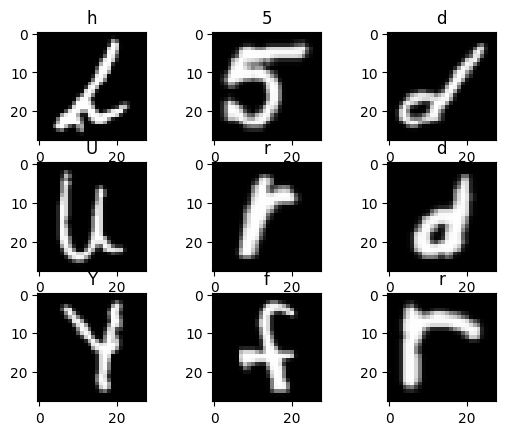

In [9]:
# Update plot titles to accurately reflect the character representations of mapped values using their ASCII codes.
# This visualization helps verify that the data has been processed and labeled correctly.

# Iterate through a subset of image indices from 100 to 108 for display.
for i in range(100, 109):
    # Create a subplot for each image in the sequence. 
    # The subplot index is adjusted to start from 1 in a 3x3 grid (331, 332, ..., 339).
    plt.subplot(330 + (i - 99))  
    
    # Display the i-th training image using a grayscale colormap.
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
    
    # Retrieve the ASCII code corresponding to the label of the i-th image from the mapping dataframe.
    ascii_code = mapp.loc[train_y.iloc[i], 'ascii']
    
    # Set the title of each subplot to the character converted from the ASCII code.
    plt.title(chr(ascii_code))  # Convert ASCII to character using chr() for the title

# Show the plot with all subplots filled. This displays the images with their respective titles.
plt.show()


In [10]:
# Determine the number of unique classes in the training dataset.
# This information is crucial for configuring the output layer of the neural network, ensuring it matches the number of distinct labels.
num_classes = train_y.nunique()

In [11]:
# Apply one-hot encoding to the labels of the training and testing datasets.
# One-hot encoding converts categorical integer labels into a binary matrix representation,
# which is necessary for training many types of neural network models, especially those used in classification tasks.

# One-hot encode the training labels, specifying the number of classes to create a binary matrix of appropriate size.
train_y = utils.to_categorical(train_y, num_classes)

# Similarly, one-hot encode the testing labels to ensure consistency in label format across both datasets.
test_y = utils.to_categorical(test_y, num_classes)

# Print the shapes of the encoded labels to confirm successful conversion and to understand the new dimensions of the label datasets.
print("train_y: ", train_y.shape)
print("test_y: ", test_y.shape)

train_y:  (112799, 47)
test_y:  (18799, 47)


In [12]:
# Reshape the training and testing image data to fit the input requirements of convolutional neural networks.
# This step involves adjusting the structure of each image data array from a flat vector to a multidimensional matrix format.

# Reshape the training images into a four-dimensional array.
# The new shape will have dimensions corresponding to: 
# - number of images, image height, image width, and number of channels (1 for grayscale images).
train_x = train_x.reshape(-1, HEIGHT, WIDTH, 1)

# Apply the same reshaping to the testing images to ensure consistency in data format across both datasets.
test_x = test_x.reshape(-1, HEIGHT, WIDTH, 1)

In [13]:
# The final step of data preprocessing involves splitting the training dataset into a smaller training set and a validation set.

# Split the original training data into a new training set and a validation set using a 10% split for validation.
# The 'random_state' parameter ensures that the split is reproducible, meaning the same data points will be assigned to each subset every time the code is run.
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.10, random_state=7)


In [14]:
# Configure the computation device for running the deep learning model.
# This step determines whether a GPU is available for use with CUDA; if not, it defaults to using the CPU.

# Check if CUDA is available and set the device accordingly. If CUDA is not available, default to the CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Print the device that will be used for model computations to confirm whether the GPU or CPU is being utilized.
print(device)

cpu


In [15]:
# The final step in preparing the data involves creating tensors from the numpy arrays,
# converting one-hot encoded labels back to class indices, and setting up DataLoader instances
# for batching and shuffling during model training.

# Convert training, testing, and validation feature data into TensorFlow tensors of type float32.
train_data_tensor = tf.convert_to_tensor(train_x, dtype=tf.float32)
test_data_tensor = tf.convert_to_tensor(test_x, dtype=tf.float32)
validation_data_tensor = tf.convert_to_tensor(val_x, dtype=tf.float32)

# Similarly, convert the labels for training, testing, and validation sets into tensors of type int32.
train_labels_tensor = tf.convert_to_tensor(train_y, dtype=tf.int32)
test_labels_tensor = tf.convert_to_tensor(test_y, dtype=tf.int32)
validation_labels_tensor = tf.convert_to_tensor(val_y, dtype=tf.int32)

# Convert one-hot encoded labels back to class indices for compatibility with TensorFlow loss functions.
# TensorFlow expects class indices for many loss calculations rather than one-hot vectors.
train_y_indices = tf.argmax(train_y, axis=1)
val_y_indices = tf.argmax(val_y, axis=1)
test_y_indices = tf.argmax(test_y, axis=1)

# Create Dataset objects that wrap the tensors. These datasets will be used to feed data into the tf.data.DataLoader.
# Dataset provides a way to access a dataset where each sample is retrieved by indexing tensors along the first dimension.
train_dataset = tf.data.Dataset.from_tensor_slices((train_data_tensor, train_labels_tensor))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data_tensor, test_labels_tensor))
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_data_tensor, validation_labels_tensor))

# Shuffle and batch the training dataset, and batch the testing and validation datasets.
# Batching helps in making the training more efficient and faster, while shuffling leads to better generalization.
train_loader = train_dataset.shuffle(buffer_size=len(train_dataset)).batch(64)
test_loader = test_dataset.batch(64)
validation_loader = validation_dataset.shuffle(buffer_size=len(validation_dataset)).batch(64)

## MLP

#### Define a base MLP model with the following parameters : <br>
1. Learning Rate Scheduler - None
2. Activation Function - ReLU    
3. Optimizer - Adam 
4. Batch Normalization - True
5. Regularization - L2
6. Dropout - True  

In [64]:
# Define a function to create a Multi-Layer Perceptron (MLP) model with customizable hyperparameters.
# This allows for easy adjustments to the activation function, batch normalization usage,
# type of regularization, regularization rate, and dropout rate for model tuning.
def create_mlp_model(activation_func='relu', 
                     use_batch_norm=True, 
                     regularization_type='l2', 
                     regularization_rate=0.0001, 
                     dropout_rate=0.5):
    
    # Start defining the model as a sequence of layers.
    model = Sequential()
    
    # The first layer will flatten the input data into a vector, assuming the input has
    # dimensions of HEIGHT, WIDTH, and a single channel (e.g., grayscale images).
    model.add(Flatten(input_shape=(HEIGHT, WIDTH, 1)))

    # Optionally apply batch normalization before the activation functions to standardize
    # inputs to a layer for each mini-batch. This often helps with training efficiency.
    if use_batch_norm:
        model.add(BatchNormalization())

    
    # Regularization helps prevent overfitting by adding a penalty for larger weights.
    if regularization_type == 'l1':
        regularizer = regularizers.l1(regularization_rate)
    elif regularization_type == 'l2':
        regularizer = regularizers.l2(regularization_rate)
    else:
        regularizer = None

    # Add the first dense (fully connected) layer with 512 neurons, using the specified activation function and regularizer
    model.add(Dense(512, activation=activation_func, 
                    kernel_regularizer=regularizer))
    if use_batch_norm:
        model.add(BatchNormalization())
    
    # Apply dropout to prevent overfitting by randomly setting a fraction of input units to 0
    # during each update during training time, which helps to prevent overfitting.
    model.add(Dropout(dropout_rate))

    # Add second dense layer with batch normalization and dropout.
    model.add(Dense(512, activation=activation_func, 
                    kernel_regularizer=regularizer))
    if use_batch_norm:
        model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Add a third dense layer, reducing the number of neurons to 256, following the same
    # regularization pattern as previous layers.
    model.add(Dense(256, activation=activation_func, 
                    kernel_regularizer=regularizer))
    if use_batch_norm:
        model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # The final dense layer reduces the model down to the number of classes with a softmax activation
    # function that will output probability-like predictions for each class.
    model.add(Dense(num_classes, activation='softmax'))

    # Return the constructed model instance to the caller.
    return model

# Here we create an instance of the MLP model with the default parameters.
# This instance will serve as our baseline model for further experimentation and evaluation.
MLP_base_model = create_mlp_model()


c:\Users\SAUMITA\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
# Specify the learning rate - a crucial hyperparameter directly influencing the covergence of model
# Default learning rate for Adam optimizer is taken for the base model
learning_rate = 0.001

# Initialize the Adam optimizer.
optimizer = Adam(learning_rate=learning_rate)

# Compile the MLP (Multi-Layer Perceptron) base model, with suitable loss function for classification of one hot encoded labels
MLP_base_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the MLP model using the training data loader.
history_mlp = MLP_base_model.fit(train_loader, epochs=10, batch_size=64, verbose=1, validation_data=validation_loader)

Epoch 1/10


1587/1587 ━━━━━━━━━━━━━━━━━━━━ 52s 29ms/step - accuracy: 0.4259 - loss: 2.3577 - val_accuracy: 0.7614 - val_loss: 0.9074
Epoch 2/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.6788 - loss: 1.2183 - val_accuracy: 0.7996 - val_loss: 0.8088
Epoch 3/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.7203 - loss: 1.0956 - val_accuracy: 0.8071 - val_loss: 0.7882
Epoch 4/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.7370 - loss: 1.0465 - val_accuracy: 0.8121 - val_loss: 0.7834
Epoch 5/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 47s 29ms/step - accuracy: 0.7501 - loss: 1.0225 - val_accuracy: 0.8207 - val_loss: 0.7677
Epoch 6/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.7551 - loss: 1.0142 - val_accuracy: 0.8253 - val_loss: 0.7723
Epoch 7/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7588 - loss: 1.0083 - val_accuracy: 0.8271 - val_loss: 0.7696
Epoch 8/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.7643 - loss: 0.99

### Hyperparameter Tuning

#### 1. Exploring Learning Rate Schedulers

In [19]:
# To enhance the performance of our model, we embarked on a comprehensive hyperparameter tuning process. 
# The first aspect of tuning we explored was the optimization of the learning rate, employing various learning rate schedulers.

def train_with_scheduler(model, optimizer, scheduler, train_loader, validation_loader):
    """
    This function orchestrates the training of a neural network model using a dynamic learning rate scheduler.
    It first compiles the model with the provided optimizer and loss function, then initiates the training process
    over a series of epochs, applying the learning rate scheduler throughout. This method is designed to allow for
    flexible adjustments of the learning rate during training, which can lead to better model performance and convergence.

    Args:
        model (keras.Model): The neural network model to be trained.
        optimizer (keras.Optimizer): The optimizer to use, determining how the model updates its weights.
        scheduler (callable): A function to adjust the learning rate based on epoch number.
        train_loader (DataLoader): The batched dataset for training.
        validation_loader (DataLoader): The batched dataset for validation.

    Returns:
        keras.History: A log of performance metrics at each epoch, useful for analysis and visualization.
    """
    # Compiling the model prepares it for training, setting up the loss computation and optimization strategy.
    model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])
    
    # The LearningRateScheduler adjusts the learning rate according to the scheduler function provided.
    lr_scheduler = LearningRateScheduler(scheduler)
    
    # The model is trained over a fixed number of epochs, with the learning rate scheduler applied as a callback.
    history = model.fit(train_loader, epochs=10, validation_data=validation_loader, callbacks=[lr_scheduler])
    
    return history

def scheduler1(epoch, lr):
    """
    A learning rate scheduler that maintains the initial learning rate for the first five epochs
    and then reduces it by a factor of ten. This simple strategy is commonly used to fine-tune models
    after initial phases of rapid convergence.

    Args:
        epoch (int): Current epoch number during training.
        lr (float): Current learning rate at the epoch start.

    Returns:
        float: Adjusted learning rate.
    """
    # The learning rate remains unchanged for the first five epochs.
    if epoch < 5:
        return lr
    # After the fifth epoch, the learning rate is reduced to encourage finer adjustments in weights.
    else:
        return lr * 0.1

def scheduler2(epoch, lr):
    """
    A more aggressive learning rate scheduler that implements a step decay: the rate is maintained
    initially, then reduced at the fifth and again at the eighth epoch. This approach helps in stabilizing
    training as it progresses deeper into the learning curve.

    Args:
        epoch (int): Current epoch number during training.
        lr (float): Current learning rate at the epoch start.

    Returns:
        float: Adjusted learning rate, based on the predefined schedule.
    """
    if epoch < 5:
        return lr
    elif epoch < 8:
        return lr * 0.1
    else:
        return lr * 0.05

# List of predefined schedulers to experiment with different training dynamics.
schedulers = [scheduler1, scheduler2]

best_scheduler = None
best_val_accuracy = 0

for scheduler in schedulers:
    # Each scheduler is tested with a fresh model instance to ensure unbiased comparison.
    model = create_mlp_model()  # Assume this function initializes a new model.
    
    learning_rate = 0.001
    optimizer = Adam(learning_rate=learning_rate)
    
    # Train the model using the current scheduler and collect training history.
    history = train_with_scheduler(model, optimizer, scheduler, train_loader, validation_loader)
    val_loss, val_accuracy = model.evaluate(validation_loader)
    
    # Record and display the validation accuracy achieved with this scheduler.
    print(f'Validation Accuracy with Scheduler {scheduler.__name__}: {val_accuracy}')
    
    # Update the best performing scheduler based on validation accuracy.
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_scheduler = scheduler

# Announce which scheduler achieved the best validation accuracy after all tests.
print(f"Best learning rate scheduler: {best_scheduler.__name__} with accuracy : {best_val_accuracy}")

Epoch 1/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.4285 - loss: 2.3447 - val_accuracy: 0.7613 - val_loss: 0.9088 - learning_rate: 0.0010
Epoch 2/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6811 - loss: 1.2048 - val_accuracy: 0.7950 - val_loss: 0.8142 - learning_rate: 0.0010
Epoch 3/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.7181 - loss: 1.0971 - val_accuracy: 0.8139 - val_loss: 0.7792 - learning_rate: 0.0010
Epoch 4/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.7390 - loss: 1.0446 - val_accuracy: 0.8173 - val_loss: 0.7800 - learning_rate: 0.0010
Epoch 5/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7475 - loss: 1.0236 - val_accuracy: 0.8241 - val_loss: 0.7714 - learning_rate: 0.0010
Epoch 6/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7683 - loss: 0.9621 - val_accuracy: 0.8348 - val_loss: 0.7221 - learning_rate: 1.0000e-04
Epoch 7/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - ac

#### 2. Exploring Activation Functions - ReLU, LeakyReLU, ELU

In [20]:
from tensorflow.keras.layers import ReLU, LeakyReLU, ELU

# Following the optimization of learning rates, we delved into examining different activation functions, 
# specifically focusing on ReLU, LeakyReLU, and ELU, to determine their impact on model performance.

# Define a dictionary of activation functions to probe their effect on model performance.
activation_functions = {
    "ReLU": ReLU(),         # ReLU, commonly used for its ability to accelerate convergence.
    "LeakyReLU": LeakyReLU(),  # LeakyReLU, offers a solution to the dying ReLU problem.
    "ELU": ELU()            # ELU, improves learning characteristics compared to ReLU.
}

# Prepare dictionaries to log the training histories and validation results of each activation function.
histories = {}
validation_results = {}

# Transform the optimal scheduler from previous experiment into a LearningRateScheduler object.
best_scheduler_object = LearningRateScheduler(best_scheduler)

# Iterate over each activation function to discern which one enhances model training the most.
for activation_name, activation_func in activation_functions.items():
    print(f"Training model with {activation_name} activation function...")
    
    # Instantiate the model using the chosen activation function to see how each influences learning.
    model = create_mlp_model(activation_func=activation_func)
    
    # Compile the model with a standard optimizer and loss function for classification of one hot encoded labels, preparing it for training.
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss=CategoricalCrossentropy(), metrics=['accuracy'])
    
    # Train the model over a set number of epochs, applying the pre-optimized learning rate scheduler.
    history = model.fit(train_loader, epochs=10, validation_data=validation_loader, callbacks=[best_scheduler_object])
    
    # Assess the effectiveness of the activation function by evaluating the model on validation data.
    val_loss, val_accuracy = model.evaluate(validation_loader)
    print(f"Validation Accuracy with {activation_name} activation function: {val_accuracy}")
    
    # Log the training process and the resulting validation metrics for each activation function.
    histories[activation_name] = history
    validation_results[activation_name] = (val_loss, val_accuracy)

# Identify the activation function that delivered the highest accuracy on the validation dataset.
best_activation = max(validation_results, key=lambda k: validation_results[k][1])
print(f"Best activation function: {best_activation}")

# Select the best-performing activation function to use in subsequent model configurations.
selected_activation = activation_functions[best_activation]


Training model with ReLU activation function...


Epoch 1/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.4222 - loss: 2.3447 - val_accuracy: 0.7627 - val_loss: 0.9087 - learning_rate: 0.0010
Epoch 2/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6813 - loss: 1.2091 - val_accuracy: 0.7926 - val_loss: 0.8082 - learning_rate: 0.0010
Epoch 3/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7255 - loss: 1.0726 - val_accuracy: 0.8124 - val_loss: 0.7782 - learning_rate: 0.0010
Epoch 4/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7349 - loss: 1.0557 - val_accuracy: 0.8233 - val_loss: 0.7711 - learning_rate: 0.0010
Epoch 5/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7475 - loss: 1.0295 - val_accuracy: 0.8189 - val_loss: 0.7767 - learning_rate: 0.0010
Epoch 6/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.7652 - loss: 0.9678 - val_accuracy: 0.8376 - val_loss: 0.7160 - learning_rate: 1.0000e-04
Epoch 7/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - ac

#### 3. Exploring Optimizers - SGD, RMSProp, Adam

In [21]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

# Subsequent to exploring activation functions, we investigated various optimizers, specifically SGD, RMSProp, and Adam,
# to identify the most effective optimizer for our model's learning and convergence.

# Define a set of optimizers with learning rate 0.0001 to explore their effects on the model's performance.
optimizers = {
    "SGD": SGD(learning_rate=0.0001),    # Stochastic Gradient Descent
    "Adam": Adam(learning_rate=0.0001),  # Adaptive Moment Estimation
    "RMSprop": RMSprop(learning_rate=0.0001)  # Root Mean Square Propagation
}

# Dictionaries to store training histories and validation results for comparison.
optimizer_histories = {}
optimizer_validation_results = {}

# Iterating over each optimizer to evaluate its effectiveness.
for optimizer_name, optimizer_instance in optimizers.items():
    print(f"Training model with {optimizer_name} optimizer...")
    
    # Create a model instance using a previously selected optimal activation function.
    model = create_mlp_model(activation_func=selected_activation)
    
    # Compile the model with the specified optimizer, setting up the framework for learning.
    model.compile(optimizer=optimizer_instance, loss=CategoricalCrossentropy(), metrics=['accuracy'])
    
    # Train the model using the training dataset along with a best scheduler found from prior tests.
    history = model.fit(train_loader, epochs=10, validation_data=validation_loader, callbacks=[best_scheduler_object])
    
    # Post training, evaluate how well the model performs on an unseen validation dataset.
    val_loss, val_accuracy = model.evaluate(validation_loader)
    print(f"Validation Accuracy with {optimizer_name} optimizer: {val_accuracy}")
    
    # Log the history of training sessions and final validation results for further assessment.
    optimizer_histories[optimizer_name] = history
    optimizer_validation_results[optimizer_name] = (val_loss, val_accuracy)

# Determine which optimizer resulted in the highest validation accuracy.
best_optimizer = max(optimizer_validation_results, key=lambda k: optimizer_validation_results[k][1])
print(f"Best optimizer: {best_optimizer}")

Training model with SGD optimizer...


Epoch 1/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.0232 - loss: 5.4420 - val_accuracy: 0.0416 - val_loss: 4.0753 - learning_rate: 1.0000e-04
Epoch 2/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.0296 - loss: 5.2319 - val_accuracy: 0.0650 - val_loss: 3.8631 - learning_rate: 1.0000e-04
Epoch 3/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.0372 - loss: 5.0179 - val_accuracy: 0.1046 - val_loss: 3.6735 - learning_rate: 1.0000e-04
Epoch 4/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.0486 - loss: 4.8347 - val_accuracy: 0.1484 - val_loss: 3.5045 - learning_rate: 1.0000e-04
Epoch 5/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.0583 - loss: 4.6493 - val_accuracy: 0.1895 - val_loss: 3.3554 - learning_rate: 1.0000e-04
Epoch 6/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.0692 - loss: 4.5282 - val_accuracy: 0.1938 - val_loss: 3.3400 - learning_rate: 1.0000e-05
Epoch 7/10
1587/1587 ━━━━━━━━━━━━━━━━━━━

#### 4. Exploring Batch Normalization Options - True, False

In [22]:
from tensorflow.keras.layers import BatchNormalization

def create_model(use_batch_norm, activation_func):
    """
    Constructs a multi-layer perceptron (MLP) model with an option to include batch normalization and a specified activation function.

    Args:
        use_batch_norm (bool): Flag indicating whether to include batch normalization layers within the model.
        activation_func (str): The name of the activation function to use in the model layers.

    Returns:
        keras.Model: A neural network model configured with or without batch normalization and the specified activation function.
    """
    # This function creates an MLP model based on the specified activation function and batch normalization preference.
    model = create_mlp_model(activation_func=activation_func, use_batch_norm=use_batch_norm)
    return model

# Dictionaries to track the training histories and evaluation outcomes for models with and without batch normalization.
batch_norm_histories = {}
batch_norm_validation_results = {}

# Experimenting with batch normalization to assess its impact on model performance.
for use_batch_norm in [True, False]:
    print(f"Training model {'with' if use_batch_norm else 'without'} Batch Normalization...")
    
    # Generate a model instance configured with the current batch normalization setting.
    model = create_model(use_batch_norm, selected_activation)
    
    # Initialize the selected optimizer, identified from previous experiment.
    learning_rate = 0.0001
    if best_optimizer == 'Adam':
        selected_optimizer = Adam(learning_rate=learning_rate)
    elif best_optimizer == 'SGD':
        selected_optimizer = SGD(learning_rate=learning_rate)
    elif best_optimizer == 'RMSprop':
        selected_optimizer = RMSprop(learning_rate=learning_rate)

    # Compile the model with a loss function for classification tasks of one hot encoded labels and metrics to evaluate accuracy.
    model.compile(optimizer=selected_optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])
    
    # Training the model using a pre-selected training loader, validation data, and an optimal scheduler identified from earlier tuning.
    history = model.fit(train_loader, epochs=10, validation_data=validation_loader, callbacks=[best_scheduler_object])
    
    # After training, evaluate the model's performance on a separate validation dataset.
    val_loss, val_accuracy = model.evaluate(validation_loader)
    print(f"Validation Accuracy {'with' if use_batch_norm else 'without'} Batch Normalization: {val_accuracy}")
    
    # Save the training history and validation results for each batch normalization configuration.
    batch_norm_histories[use_batch_norm] = history
    batch_norm_validation_results[use_batch_norm] = (val_loss, val_accuracy)

# Determine which configuration of batch normalization yields the highest accuracy on the validation set.
best_batch_norm_option = max(batch_norm_validation_results, key=lambda k: batch_norm_validation_results[k][1])
print(f"Best Batch Normalization Option: {'with' if best_batch_norm_option else 'without'}")


Training model with Batch Normalization...


Epoch 1/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.1556 - loss: 3.9357 - val_accuracy: 0.6232 - val_loss: 1.4601 - learning_rate: 1.0000e-04
Epoch 2/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.4647 - loss: 2.0538 - val_accuracy: 0.6932 - val_loss: 1.1621 - learning_rate: 1.0000e-04
Epoch 3/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5563 - loss: 1.6616 - val_accuracy: 0.7262 - val_loss: 1.0235 - learning_rate: 1.0000e-04
Epoch 4/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6111 - loss: 1.4465 - val_accuracy: 0.7520 - val_loss: 0.9233 - learning_rate: 1.0000e-04
Epoch 5/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6486 - loss: 1.2977 - val_accuracy: 0.7678 - val_loss: 0.8510 - learning_rate: 1.0000e-04
Epoch 6/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.6694 - loss: 1.2120 - val_accuracy: 0.7724 - val_loss: 0.8402 - learning_rate: 1.0000e-05
Epoch 7/10
1587/1587 ━━━━━━━━━━━━━━━━━━━

#### 5. Exploring Regularization types  - None, L1 Regularization, L2 Regularization

In [23]:
from tensorflow.keras.regularizers import l1, l2

# After assessing optimizers, our tuning efforts extended to regularization techniques to mitigate overfitting.
# We experimented with no regularization, L1 Regularization, and L2 Regularization, evaluating their effects on model robustness.

def create_model(regularization_type='l2', regularization_rate=0.0001):
    """
    Creates a multi-layer perceptron (MLP) model equipped with specified regularization.

    Args:
        regularization_type (str, optional): Type of regularization to apply ('l1' or 'l2'). If None, no regularization is applied.
        regularization_rate (float, optional): The regularization coefficient, influencing the penalty strength. Default is 0.0001.

    Returns:
        keras.Model: A compiled neural network model incorporating the specified regularization settings.
    """
    # Instantiate the MLP model with the designated regularization settings
    model = create_mlp_model(regularization_type=regularization_type, regularization_rate=regularization_rate)
    return model

# Initialize dictionaries to keep track of training histories and validation results across different regularization strategies
regularization_histories = {}
regularization_validation_results = {}

# Test the model with various regularization settings to evaluate their impact on performance
for regularization_type in [None, 'l1', 'l2']:
    print(f"Training model {'without' if regularization_type is None else regularization_type.upper()} regularization...")
    
    # Create a new model instance with the current regularization setting
    model = create_model(regularization_type)
    
    # If batch normalization was determined beneficial in previous tests, incorporate it into the model
    if best_batch_norm_option:
        model.add(BatchNormalization())
        model.add(BatchNormalization())
    
    # Initialize the selected optimizer, found in earlier experiments.
    learning_rate = 0.001
    if best_optimizer == 'Adam':
        selected_optimizer = Adam(learning_rate=learning_rate)
    elif best_optimizer == 'SGD':
        selected_optimizer = SGD(learning_rate=learning_rate)
    elif best_optimizer == 'RMSprop':
        selected_optimizer = RMSprop(learning_rate=learning_rate)
    
    # Compile the model using selected optimizer and a suitable loss function for classification of one hot encoded labels
    model.compile(optimizer=selected_optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])
    
    # Train the model using the training dataset, applying the best scheduler found in earlier experiments
    history = model.fit(train_loader, epochs=10, validation_data=validation_loader, callbacks=[best_scheduler_object])
    
    # Assess the model's performance on the validation dataset
    val_loss, val_accuracy = model.evaluate(validation_loader)
    print(f"Validation Accuracy {'without' if regularization_type is None else regularization_type.upper()} regularization: {val_accuracy}")
    
    # Record the training history and validation results for later analysis
    regularization_histories[regularization_type] = history
    regularization_validation_results[regularization_type] = (val_loss, val_accuracy)

# Determine which regularization approach yielded the highest validation accuracy
best_regularization_option = max(regularization_validation_results, key=lambda k: regularization_validation_results[k][1])
print(f"Best Regularization Option: {'without' if best_regularization_option is None else best_regularization_option.upper()}")

Training model without regularization...


Epoch 1/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.4255 - loss: 2.3492 - val_accuracy: 0.7621 - val_loss: 0.9097 - learning_rate: 0.0010
Epoch 2/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6805 - loss: 1.2100 - val_accuracy: 0.7943 - val_loss: 0.8235 - learning_rate: 0.0010
Epoch 3/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.7208 - loss: 1.0915 - val_accuracy: 0.8142 - val_loss: 0.7795 - learning_rate: 0.0010
Epoch 4/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7384 - loss: 1.0468 - val_accuracy: 0.8182 - val_loss: 0.7734 - learning_rate: 0.0010
Epoch 5/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7520 - loss: 1.0196 - val_accuracy: 0.8215 - val_loss: 0.7724 - learning_rate: 0.0010
Epoch 6/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7705 - loss: 0.9660 - val_accuracy: 0.8351 - val_loss: 0.7201 - learning_rate: 1.0000e-04
Epoch 7/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - ac

#### 6. Exploring Dropout Options - With, Without

In [67]:
from tensorflow.keras.layers import Dropout

# Concluding our hyperparameter tuning, we examined the model's performance with and without the implementation of dropout,
# aiming to understand its impact on reducing overfitting and improving generalization.

def create_model(regularization_type, dropout_rate=0.5, regularization_rate=0.0001):
    """
    Creates a multi-layer perceptron (MLP) model with an optional dropout regularization.

    Args:
        dropout_rate (float, optional): The fraction of the input units to drop, as a float between 0 and 1. 
                                        A value of 0.0 means no dropout, and the default is 0.5.

    Returns:
        keras.Model: A compiled neural network model with the specified dropout rate.
    """
    # Create an MLP model with the specified dropout rate for regularization
    model = create_mlp_model(regularization_type=regularization_type, dropout_rate=dropout_rate, regularization_rate=regularization_rate)
    return model

# Initialize dictionaries to store training histories and evaluation results for different dropout configurations
dropout_histories = {}
dropout_validation_results = {}

# Iterate over options to explore the effect of having dropout or not in the network
for dropout_rate in [0.0, 0.5]:
    print(f"Training model {'without' if dropout_rate == 0.0 else 'with'} Dropout ...")
    
    # Create an instance of the model with the current dropout rate
    model = create_model(best_regularization_option, dropout_rate)

    # Optionally add batch normalization layers if determined to be beneficial from prior experiments
    if best_batch_norm_option:
        model.add(BatchNormalization())
        model.add(BatchNormalization())

    # Initialize the selected optimizer, found in prior experiments.
    learning_rate = 0.0001
    if best_optimizer == 'Adam':
        selected_optimizer = Adam(learning_rate=learning_rate)
    elif best_optimizer == 'SGD':
        selected_optimizer = SGD(learning_rate=learning_rate)
    elif best_optimizer == 'RMSprop':
        selected_optimizer = RMSprop(learning_rate=learning_rate)
    
    # Compile the model using the best regularization technique from prior tuning efforts
    if best_regularization_option == 'l1':
        # Use L1 regularization in model compilation if previously determined to be the best
        model.compile(optimizer=selected_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    elif best_regularization_option == 'l2':
        # Use L2 regularization if it was selected as the most effective
        model.compile(optimizer=selected_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    else:
        # Compile without additional regularization if neither L1 nor L2 was chosen
        model.compile(optimizer=selected_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model using the training set and the best scheduler from previous tuning
    history = model.fit(train_loader, epochs=10, validation_data=validation_loader, callbacks=[best_scheduler_object])
    
    # Evaluate the model's performance on the validation set
    val_loss, val_accuracy = model.evaluate(validation_loader)
    print(f"Validation Accuracy {'without' if dropout_rate == 0.0 else 'with'} Dropout : {val_accuracy}")
    
    # Store the training history and validation results for this dropout configuration
    dropout_histories[dropout_rate] = history
    dropout_validation_results[dropout_rate] = (val_loss, val_accuracy)

# Determine the dropout configuration that resulted in the highest validation accuracy
best_dropout_option = max(dropout_validation_results, key=lambda k: dropout_validation_results[k][1])
print(f"Best Dropout Option: {'without' if best_dropout_option == 0.0 else 'with'} Dropout")

Training model without Dropout ...
Epoch 1/10


c:\Users\SAUMITA\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1587/1587 ━━━━━━━━━━━━━━━━━━━━ 45s 25ms/step - accuracy: 0.5091 - loss: 2.0267 - val_accuracy: 0.7621 - val_loss: 0.9308 - learning_rate: 1.0000e-04
Epoch 2/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7812 - loss: 0.8648 - val_accuracy: 0.8010 - val_loss: 0.7675 - learning_rate: 1.0000e-04
Epoch 3/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.8256 - loss: 0.6924 - val_accuracy: 0.8140 - val_loss: 0.7032 - learning_rate: 1.0000e-04
Epoch 4/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8492 - loss: 0.6048 - val_accuracy: 0.8222 - val_loss: 0.6708 - learning_rate: 1.0000e-04
Epoch 5/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.8679 - loss: 0.5345 - val_accuracy: 0.8321 - val_loss: 0.6458 - learning_rate: 1.0000e-04
Epoch 6/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8904 - loss: 0.4669 - val_accuracy: 0.8372 - val_loss: 0.6260 - learning_rate: 1.0000e-05
Epoch 7/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/

In [25]:
# To have a clear perspective on the best hyperparameters, the following summarization outlines the optimal settings achieved through our extensive testing.

print("The best hyperparameters obtained are :\n")

# Print the learning rate scheduler that yielded the best results in training dynamics.
print("Best LR Scheduler : ", best_scheduler)

# Show the activation function that enhanced model responsiveness and effectiveness.
print("Best Activation Function : ", best_activation)

# Display the optimizer that contributed most significantly to learning efficiency.
print("Best Optimizer : ", best_optimizer)

# Indicate whether applying Batch Normalization improved the model's performance.
print("Best Batch Normalization option : ", best_batch_norm_option)

# State the type of regularization that effectively minimized overfitting.
print("Best Regularization option : ", best_regularization_option)

# Share the dropout configuration that optimized the model's generalization capabilities.
print("Best Dropout Option : ", best_dropout_option)

The best hyperparameters obtained are :

Best LR Scheduler :  <function scheduler1 at 0x000001A9EB6943A0>
Best Activation Function :  ReLU
Best Optimizer :  Adam
Best Batch Normalization option :  False
Best Regularization option :  l2
Best Dropout Option :  0.0


#### With all the best obtained hyperparameters, experimenting the model with different learning rates

In [26]:
# Initialize dictionaries to store training histories and evaluation results for different learning rates
lr_histories = {}
lr_validation_results = {}

# Define the learning rates to explore
learning_rates = [0.01, 0.001, 0.0001]

# Iterate over the learning rates to train and evaluate models
for learning_rate in learning_rates:
    print(f"Training model with Learning Rate: {learning_rate} ...")
    
    # Create an instance of the model with the specified learning rate
    model = create_mlp_model(activation_func=selected_activation, regularization_type=best_regularization_option, dropout_rate=best_dropout_option)
        
    # Optionally add batch normalization layers if determined to be beneficial from prior experiments
    if best_batch_norm_option:
        model.add(BatchNormalization())
        model.add(BatchNormalization())

    # Initialize the selected optimizer with the current learning rate
    if best_optimizer == 'Adam':
        selected_optimizer = Adam(learning_rate=learning_rate)
    elif best_optimizer == 'SGD':
        selected_optimizer = SGD(learning_rate=learning_rate)
    elif best_optimizer == 'RMSprop':
        selected_optimizer = RMSprop(learning_rate=learning_rate)

    # Compile the model with the selected optimizer and the loss function for classification of one hot encoded labels
    model.compile(optimizer=selected_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model using the training set and the best scheduler from previous tuning
    history = model.fit(train_loader, epochs=10, validation_data=validation_loader, callbacks=[best_scheduler_object])
    
    # Evaluate the model's performance on the validation set
    val_loss, val_accuracy = model.evaluate(validation_loader)
    print(f"Validation Accuracy with Learning Rate {learning_rate}: {val_accuracy}")
    
    # Store the training history and validation results for this learning rate
    lr_histories[learning_rate] = history
    lr_validation_results[learning_rate] = (val_loss, val_accuracy)

# Determine the learning rate that resulted in the highest validation accuracy
best_lr = max(lr_validation_results, key=lambda k: lr_validation_results[k][1])
print(f"Best Learning Rate Option: {best_lr}")

Training model with Learning Rate: 0.01 ...
Epoch 1/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.6259 - loss: 1.7281 - val_accuracy: 0.7103 - val_loss: 1.4547 - learning_rate: 0.0100
Epoch 2/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7188 - loss: 1.4277 - val_accuracy: 0.7613 - val_loss: 1.1561 - learning_rate: 0.0100
Epoch 3/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7459 - loss: 1.1863 - val_accuracy: 0.7601 - val_loss: 1.0874 - learning_rate: 0.0100
Epoch 4/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.7639 - loss: 1.0435 - val_accuracy: 0.7848 - val_loss: 0.9570 - learning_rate: 0.0100
Epoch 5/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7715 - loss: 0.9870 - val_accuracy: 0.7566 - val_loss: 0.9963 - learning_rate: 0.0100
Epoch 6/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.8199 - loss: 0.7860 - val_accuracy: 0.8429 - val_loss: 0.6617 - learning_rate: 1.0000e-03
Epoch 7/10
1587/

#### Designing the final MLP model with all the selected hyperparameters

In [68]:
# Based on the best hyperparameters, a final MLP model is curated for optimal results.
# Here we define the model architecture incorporating all optimal settings identified during the testing phase.

# Instantiate the MLP model with the selected activation function, the best type of regularization, and the optimal dropout rate.
final_model_MLP = create_mlp_model(activation_func=selected_activation, regularization_type=best_regularization_option, dropout_rate=best_dropout_option)

# If batch normalization was determined to be beneficial, add it to the model for improved training stability and performance.
if best_batch_norm_option:
    final_model_MLP.bn1 = layers.BatchNormalization()
    final_model_MLP.bn2 = layers.BatchNormalization()

# Select the best learning rate from previous experiment
learning_rate = best_lr

# Initialize the selected optimizer that provided the best learning efficiency during the hyperparameter tuning phase.
if best_optimizer == 'Adam':
    selected_optimizer = Adam(learning_rate=learning_rate)
elif best_optimizer == 'SGD':
    selected_optimizer = SGD(learning_rate=learning_rate)
elif best_optimizer == 'RMSprop':
    selected_optimizer = RMSprop(learning_rate=learning_rate)

# Compile the model with the chosen optimizer.
final_model_MLP.compile(optimizer=selected_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Output a summary of the final model configuration to verify all components are correctly implemented.
final_model_MLP.summary()

c:\Users\SAUMITA\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 47)             │        12,079 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 816,239 (3.11 MB)

 Trainable params: 812,111 (3.10 MB)

 Non-trainable params: 4,128 (16.12 KB)

Training the Final MLP Model 

In [70]:
from tensorflow.keras.callbacks import EarlyStopping

def train_and_evaluate(model, optimizer, scheduler, train_loader, validation_loader, epochs=10):
    """
    Train and evaluate a machine learning model using the provided parameters.
    
    Args:
        model: The neural network model to be trained and evaluated.
        optimizer: The optimization algorithm to use for training the model.
        scheduler: A learning rate scheduler to adjust the learning rate during training.
        train_loader: The dataset used for training the model.
        validation_loader: The dataset used for validating the model performance.
        epochs: The number of training cycles through the dataset.

    Returns:
        A history object containing records of training and validation metrics throughout the epochs.
    """
    
    # Compile the model using the specified optimizer and loss function to prepare for training.
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Set up early stopping to halt training when the validation loss ceases to improve, thus preventing overfitting.
    early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

    # Begin training the model, using both the learning rate scheduler and early stopping to optimize performance.
    history = model.fit(train_loader, epochs=epochs, validation_data=validation_loader, callbacks=[scheduler, early_stopping])
    
    # After training, evaluate and print the model's performance on the training dataset.
    train_loss, train_accuracy = model.evaluate(train_loader)
    print(f'Training Loss: {train_loss}, Training Accuracy: {train_accuracy}')
    
    # Evaluate and print the model's performance on the validation dataset to understand how well it generalizes.
    val_loss, val_accuracy = model.evaluate(validation_loader)
    print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')
    
    # Return the history of training and validation metrics to allow for further analysis if necessary.
    return history

# Start a timer to measure the total time taken by the training process.
start_time = time.time()

# Train and evaluate the final model using the best optimizer and learning rate scheduler derived from previous tuning.
final_model_history_MLP = train_and_evaluate(final_model_MLP, best_optimizer, LearningRateScheduler(best_scheduler), train_loader, validation_loader)

# Stop the timer after the training and evaluation have concluded.
end_time = time.time()

# Print the total training time, providing insights into the computational efficiency of the model training.
print("MLP Model Training Time:", end_time - start_time, "seconds")


Epoch 1/10


1587/1587 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.6685 - loss: 1.2874 - val_accuracy: 0.8097 - val_loss: 0.7341 - learning_rate: 0.0010
Epoch 2/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.8142 - loss: 0.7123 - val_accuracy: 0.8191 - val_loss: 0.7028 - learning_rate: 0.0010
Epoch 3/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.8337 - loss: 0.6573 - val_accuracy: 0.8341 - val_loss: 0.6847 - learning_rate: 0.0010
Epoch 4/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.8468 - loss: 0.6168 - val_accuracy: 0.8343 - val_loss: 0.6786 - learning_rate: 0.0010
Epoch 5/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.8544 - loss: 0.6049 - val_accuracy: 0.8355 - val_loss: 0.6815 - learning_rate: 0.0010
Epoch 6/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.8819 - loss: 0.5219 - val_accuracy: 0.8660 - val_loss: 0.5657 - learning_rate: 1.0000e-04
Epoch 7/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.9

##### Further Experimenting by Increasing number of layers

In [69]:
# To further experiment, a version of the model with additional 2 hidden layers was created to further test and evaluate
# with a set of hyperparameters that were previously chosen as the best ones
def create_mlp_model_with_extra_layers(activation_func='relu', use_batch_norm=True, regularization_type='l2', regularization_rate=0.0001, dropout_rate=0.0):
    """
    Create an MLP model with additional hidden layers to further enhance and test the model's capacity and robustness.
    
    Args:
        activation_func (str): The activation function to be used in hidden layers.
        use_batch_norm (bool): Flag to determine whether batch normalization layers are to be included.
        regularization_type (str): Type of regularization ('l2' for L2 regularization).
        regularization_rate (float): The lambda value for the regularization.
        dropout_rate (float): The fraction of neurons to drop out during training for regularization.

    Returns:
        model: A Keras Sequential model with additional hidden layers and specified configurations.

    Description:
        This function constructs a deeper MLP model with five hidden layers. Each layer is optionally 
        followed by batch normalization and dropout for regularization. This model is designed to evaluate
        how increased depth and complexity affect performance, particularly in avoiding overfitting while
        managing larger datasets or more complex feature interactions.
    """

    # Initialize the model.
    model = Sequential()
    model.add(Flatten(input_shape=(HEIGHT, WIDTH, 1)))

    # Apply initial batch normalization if specified.
    if use_batch_norm:
        model.add(BatchNormalization())

    # Regularization helps prevent overfitting by adding a penalty for larger weights.
    if regularization_type == 'l1':
        regularizer = regularizers.l1(regularization_rate)
    elif regularization_type == 'l2':
        regularizer = regularizers.l2(regularization_rate)
    else:
        regularizer = None

    # Define the first hidden layer with dropout and regularization.
    model.add(Dense(512, activation=activation_func, kernel_regularizer=regularizer))
    if use_batch_norm:
        model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Repeat the above step for additional four layers, modifying the number of units in the third and fifth layers.
    for _ in range(2):
        model.add(Dense(512, activation=activation_func, kernel_regularizer=regularizer))
        if use_batch_norm:
            model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))

    for _ in range(2):
        model.add(Dense(256, activation=activation_func, kernel_regularizer=regularizer))
        if use_batch_norm:
            model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))

    # Final layer with softmax activation for multi-class classification.
    model.add(Dense(num_classes, activation='softmax'))

    # Return the constructed model.
    return model

# To further optimize the model, a version with additional 5 hidden layers was created to further test and evaluate.
# Create an instance of the MLP model with 5 hidden layers.
MLP_model_with_more_layers = create_mlp_model_with_extra_layers()

In [31]:
# By integrating 5 additional hidden layers, we aim to assess whether a deeper network can capture more complex patterns in the data.
# This approach is often explored to determine if increased model depth results in better accuracy and generalization on unseen data.

# Start timing the training process to gauge the computational effort required for a larger model.
start_time = time.time()

# Train and evaluate the enhanced model using the selected best optimizer and learning rate scheduler.
model_history_MLP_more_layers = train_and_evaluate(MLP_model_with_more_layers, best_optimizer, LearningRateScheduler(best_scheduler), train_loader, validation_loader)

# Stop the timer after training and evaluating to calculate the total duration of the training process.
end_time = time.time()

# Print the time taken to train the model, providing insight into the computational demands of a deeper network.
print("MLP Model Training Time:", end_time - start_time, "seconds")

Epoch 1/10


1587/1587 ━━━━━━━━━━━━━━━━━━━━ 64s 36ms/step - accuracy: 0.6477 - loss: 1.4429 - val_accuracy: 0.8035 - val_loss: 0.8228 - learning_rate: 0.0010
Epoch 2/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.8032 - loss: 0.8307 - val_accuracy: 0.8190 - val_loss: 0.7925 - learning_rate: 0.0010
Epoch 3/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 49s 30ms/step - accuracy: 0.8227 - loss: 0.7685 - val_accuracy: 0.8252 - val_loss: 0.7692 - learning_rate: 0.0010
Epoch 4/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.8317 - loss: 0.7372 - val_accuracy: 0.8248 - val_loss: 0.7729 - learning_rate: 0.0010
Epoch 5/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.8366 - loss: 0.7145 - val_accuracy: 0.8309 - val_loss: 0.7527 - learning_rate: 0.0010
Epoch 6/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.8747 - loss: 0.6011 - val_accuracy: 0.8652 - val_loss: 0.6135 - learning_rate: 1.0000e-04
Epoch 7/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.8

Observation : As compared to previous model with 3 dense layers which produced a validation accuracy of 86.97 and validation loss of 0.56 and was trained in 419.24 seconds, this model with 5 dense layers and same number of neurons produced a validation accuracy of 86.79% and validation loss of 0.61 with a training time of 539.37 seconds. It can be seen that while increasing the layers take more time to train, it produces almost similar validation accuracy and a validation loss slightly more than the model with less number of hidden layers. So the earlier model with 3 hidden layers is more suitable here.

##### <br>Another experiment by Decreasing the number of neurons

In [32]:
# Another expermient was conducted to a build a streamlined MLP model featuring three hidden layers, each with a reduced neuron count of 128. 
# This configuration is tailored to explore the efficiency and performance of a less complex neural network while still employing the best-practice hyperparameters determined from prior optimizations.

def create_mlp_model_with_less_neurons(activation_func='relu', use_batch_norm=True, regularization_type='l2', regularization_rate=0.0001, dropout_rate=0.0):
    """
    Construct an MLP model with three hidden layers, each containing a reduced number of neurons (128), to test the impact of a smaller network size on performance.
    
    Args:
        activation_func (str): The activation function to be used in the hidden layers.
        use_batch_norm (bool): Specifies whether to include batch normalization layers between hidden layers.
        regularization_type (str): Specifies the type of regularization to apply to each layer ('l2' for L2 regularization).
        regularization_rate (float): The strength of the regularization.
        dropout_rate (float): The fraction of neurons to be dropped out during training to prevent overfitting.

    Returns:
        model (Sequential): A TensorFlow/Keras model configured with reduced complexity.

    Description:
        This function creates a multi-layer perceptron (MLP) model designed for experiments where the number of neurons per layer is intentionally limited.
    """

    # Initialize the model with a flat input layer to handle input data.
    model = Sequential()
    model.add(Flatten(input_shape=(HEIGHT, WIDTH, 1)))

    # Optional batch normalization before each hidden layer enhances model training stability.
    if use_batch_norm:
        model.add(BatchNormalization())

    # Regularization helps prevent overfitting by adding a penalty for larger weights.
    if regularization_type == 'l1':
        regularizer = regularizers.l1(regularization_rate)
    elif regularization_type == 'l2':
        regularizer = regularizers.l2(regularization_rate)
    else:
        regularizer = None

    # First hidden layer with reduced neuron count, regularization, and dropout.
    model.add(Dense(128, activation=activation_func, kernel_regularizer=regularizer))
    if use_batch_norm:
        model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Second hidden layer, similar configuration.
    model.add(Dense(128, activation=activation_func, kernel_regularizer=regularizer))
    if use_batch_norm:
        model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Third hidden layer, maintaining consistency in configuration.
    model.add(Dense(128, activation=activation_func, kernel_regularizer=regularizer))
    if use_batch_norm:
        model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Output layer using softmax to classify into multiple classes.
    model.add(Dense(num_classes, activation='softmax'))

    # Return the assembled model.
    return model

# Create an instance of the MLP model with fewer neurons to evaluate whether reducing the network size impacts performance.
MLP_model_with_less_neurons = create_mlp_model_with_less_neurons()

In [33]:
# Initiating the process to train and evaluate the MLP model that has been simplified with fewer neurons in each layer. 

# Start timing to monitor the duration of training the less complex model.
start_time = time.time()

# Train and evaluate the streamlined model using the optimized hyperparameters. This involves fitting the model on the training set, 
# using the best optimizer and learning rate scheduler previously identified, and then validating it on a separate validation set.
model_history_MLP_less_neurons = train_and_evaluate(MLP_model_with_less_neurons, best_optimizer, LearningRateScheduler(best_scheduler), train_loader, validation_loader)

# Stop the timer after the model training and validation process is complete to capture the total time taken.
end_time = time.time()

# Output the total time spent training the model, providing an insight into the computational demand of training a less complex network.
print("MLP Model Training Time:", end_time - start_time, "seconds")

Epoch 1/10


1587/1587 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.5903 - loss: 1.5281 - val_accuracy: 0.7943 - val_loss: 0.7020 - learning_rate: 0.0010
Epoch 2/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7915 - loss: 0.6887 - val_accuracy: 0.8105 - val_loss: 0.6196 - learning_rate: 0.0010
Epoch 3/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8190 - loss: 0.5939 - val_accuracy: 0.8219 - val_loss: 0.5829 - learning_rate: 0.0010
Epoch 4/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8301 - loss: 0.5571 - val_accuracy: 0.8240 - val_loss: 0.5871 - learning_rate: 0.0010
Epoch 5/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8404 - loss: 0.5311 - val_accuracy: 0.8253 - val_loss: 0.5941 - learning_rate: 0.0010
Epoch 6/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8621 - loss: 0.4707 - val_accuracy: 0.8485 - val_loss: 0.5131 - learning_rate: 1.0000e-04
Epoch 7/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8

Observation: As compared to model with 3 dense layers with 512, 512 and 256 neurons which produced a validation accuracy of 86.60 and validation loss of 0.57 and was trained in 419.24 seconds, this model with 3 dense layers with 128 neurons in each layer produced a validation accuracy of 84.95% and validation loss of 0.51 with a training time of 203.65 seconds. It can be seen that while decreasing the number of neurons significantly reduces the training time by half and produces slightly lesser loss, both the training and validation accuracies are reduced by nearly 2% . While this may be acceptable depending on the type of task, here we prefer higher accuracy over training time since its a classification task where we need the model to identify the labels of the images accurately.

##### <br>Testing the various MLP models on Test Dataset

In [73]:
from sklearn.metrics import accuracy_score

def evaluate_model(model, test_x, test_y):
    """
    Evaluate the performance of a given model using a test dataset, and compute the accuracy by comparing predictions to actual labels.

    Args:
        model: The trained machine learning model to be evaluated.
        test_x (np.array): Input features from the test dataset.
        test_y (np.array): True labels corresponding to the input features from the test dataset.

    Returns:
        tuple: A tuple containing the test loss and test accuracy.
    
    Description:
        This function compiles the model with a specific loss function and optimizer, then evaluates its performance
        on the test dataset to obtain the loss and accuracy. It further validates the accuracy independently by 
        making predictions on the test dataset and comparing the predicted labels against the true labels.
    """

    # Compile the model with a standard loss function and optimizer to prepare for evaluation.
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    # Evaluate the model on the test data to get the initial loss and accuracy, without printing additional details.
    test_loss_MLP, test_accuracy_MLP = model.evaluate(test_x, test_y, verbose=0)
    print("Test Loss:", test_loss_MLP)
    print("Test Accuracy:", test_accuracy_MLP)

    # Generate predictions for the test dataset to further analyze model performance.
    test_predictions = model.predict(test_x)
    predicted_labels = np.argmax(test_predictions, axis=1)

    # Calculate the accuracy by comparing predicted labels to the actual labels in the test dataset.
    test_accuracy_MLP = accuracy_score(test_y.argmax(axis=1), predicted_labels)
    print("Test Accuracy (Using Predictions):", test_accuracy_MLP)

    # Return the test loss and recalculated accuracy for further analysis or reporting.
    return test_loss_MLP, test_accuracy_MLP

Evaluation of base MLP model and the final MLP model on the test dataset

In [74]:
# Assess the performance of base MLP model on the test dataset
# Call the `evaluate_model` function, passing in the base MLP model
evaluate_model(MLP_base_model, test_x, test_y)

Test Loss: 0.7697518467903137
Test Accuracy: 0.8326506614685059
588/588 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step
Test Accuracy (Using Predictions): 0.8326506729081334


(0.7697518467903137, 0.8326506729081334)

In [78]:
# After tuning and selecting the best hyperparameters and configurations for our MLP model, we have arrived at our final model design.
# We call `evaluate_model` with the final MLP model and the test dataset.

scores  = evaluate_model(final_model_MLP, test_x, test_y)

# Extract the test loss and test accuracy from the scores returned by the evaluation function. 
test_loss_MLP = scores[0]
test_accuracy_MLP = scores[1]

# Print the test loss and accuracy.
print("Test loss : ", test_loss_MLP)
print("Test accuracy : ", test_accuracy_MLP)

Test Loss: 0.5752153992652893
Test Accuracy: 0.8696739077568054
588/588 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step
Test Accuracy (Using Predictions): 0.8696739188254694
Test loss :  0.5752153992652893
Test accuracy :  0.8696739188254694


### Plotting the loss and accuracy graphs for MLP

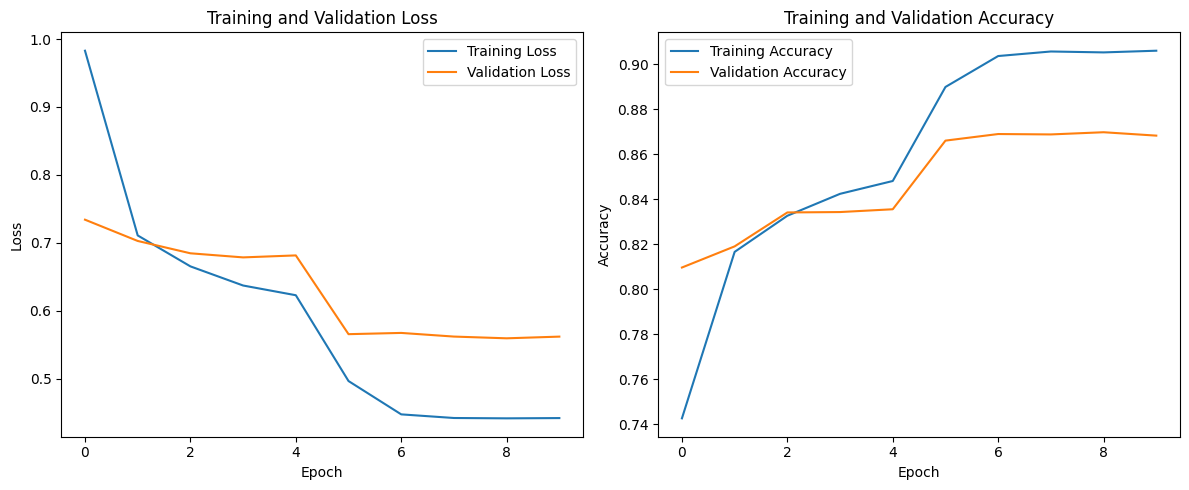

In [79]:
# To visually assess the performance of our final MLP model across training epochs, we plot graphs for both loss and accuracy.

# Initialize a larger figure to accommodate both plots side by side for a more comparative view.
plt.figure(figsize=(12, 5))

# Plotting the training and validation loss over epochs.
# This first subplot will help us visualize the loss reduction over time, showing how well the model is learning from both
# the training and validation datasets. A converging pattern between these two lines would suggest good model generalization.
plt.subplot(1, 2, 1)
plt.plot(final_model_history_MLP.history['loss'], label='Training Loss')
plt.plot(final_model_history_MLP.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting the training and validation accuracy over epochs.
# The second subplot provides a visual representation of accuracy improvements over each epoch for both training and
# validation sets. Increasing trends here are desirable, indicating that the model not only learns well but also generalizes well.
plt.subplot(1, 2, 2)
plt.plot(final_model_history_MLP.history['accuracy'], label='Training Accuracy')
plt.plot(final_model_history_MLP.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Adjust the layout of the plots to ensure that they are neatly arranged and labels are clearly visible.
plt.tight_layout()

# Display the plots. This visual feedback is crucial for quick assessment of the training outcomes and to make
# decisions about potential adjustments in model training strategy or early stopping.
plt.show()

In [80]:
# Generate predictions for the test dataset using the final trained MLP model and 
# convert the probabilities to a binary class decision (0 or 1) by applying a threshold.
y_pred = final_model_MLP.predict(test_x)
y_pred = (y_pred > 0.5)

588/588 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


Testing the MLP model - Display the predicted labels and true labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Labels: [39  9 26  9 33 14]
True Labels: [39  9 26 44 33 14]


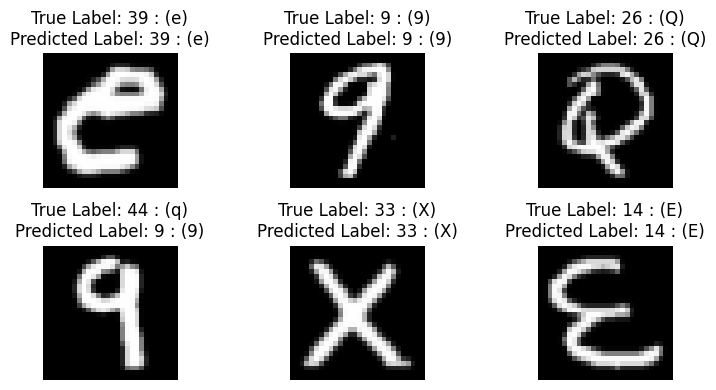

In [136]:
# Print the predictions for the top six samples in the testing dataset and compare them with the true labels
# This step helps evaluate how well the model is predicting by comparing its output with actual data.

# Extract the first six samples from the testing dataset for prediction.
top_six_samples = test_x[:6]

# Retrieve the actual labels for these samples from the test dataset.
true_labels = test_y.argmax(axis=1)[:6]

# Use the model to predict the labels for these selected samples.
predictions = final_model_MLP.predict(top_six_samples)

# Convert the predicted probabilities to class indices for easier comparison.
predicted_labels = np.argmax(predictions, axis=1)

# Print the predicted and true labels to visually inspect the model's performance on these specific cases.
print("Predicted Labels:", predicted_labels)
print("True Labels:", true_labels)


# Define a function to plot images with their true and predicted labels. This visual feedback is crucial for assessing the model's practical performance.
def plot_images(images, true_labels, predicted_labels):
    """
    Display images alongside their true and predicted labels to visually assess the model's classification accuracy.

    This function plots a grid of images, each annotated with the true and predicted labels, providing a straightforward
    visual representation of the model's performance. Such visuals are beneficial for quickly identifying misclassifications
    and understanding the model's behavior in practical scenarios.

    Parameters:
    images (array): An array of images to be displayed, where each image should be reshapeable to 28x28 pixels.
    true_labels (list): The actual labels for each image.
    predicted_labels (list): The labels predicted by the model for each image.
    """
    plt.figure(figsize=(8, 4))  # Define the figure size to ensure each image and its labels are clearly visible.
    for i in range(len(images)):  # Iterate through the list of images to plot each one.
        plt.subplot(2, 3, i+1)  # Arrange the images in a 2x3 grid.
        plt.imshow(images[i].reshape(28, 28), cmap='gray')  # Display the image in grayscale for clarity.

        # Retrieve the ASCII code corresponding to the true label of the i-th image from the mapping dataframe.
        true_ascii_code = mapp.loc[true_labels[i], 'ascii']
    
        # Retrieve the ASCII code corresponding to the predicted label of the i-th image from the mapping dataframe.
        predicted_ascii_code = mapp.loc[predicted_labels[i], 'ascii']
        
        # Set the title of each subplot to include both true and predicted labels along with their corresponding characters.
        plt.title(f'True Label: {true_labels[i]} : ({chr(true_ascii_code)})\nPredicted Label: {predicted_labels[i]} : ({chr(predicted_ascii_code)})')

        plt.axis('off')  # Remove axes to focus on the image and labels.
    plt.tight_layout()  # Automatically adjust subplots to give specified padding and avoid overlap.
    plt.show()

# Plot the images along with their true and predicted labels.
# This visualization step is essential to demonstrate the model's effectiveness in a clear and interpretable manner.
plot_images(top_six_samples, true_labels, predicted_labels)


Print the confusion matrix for the MLP model

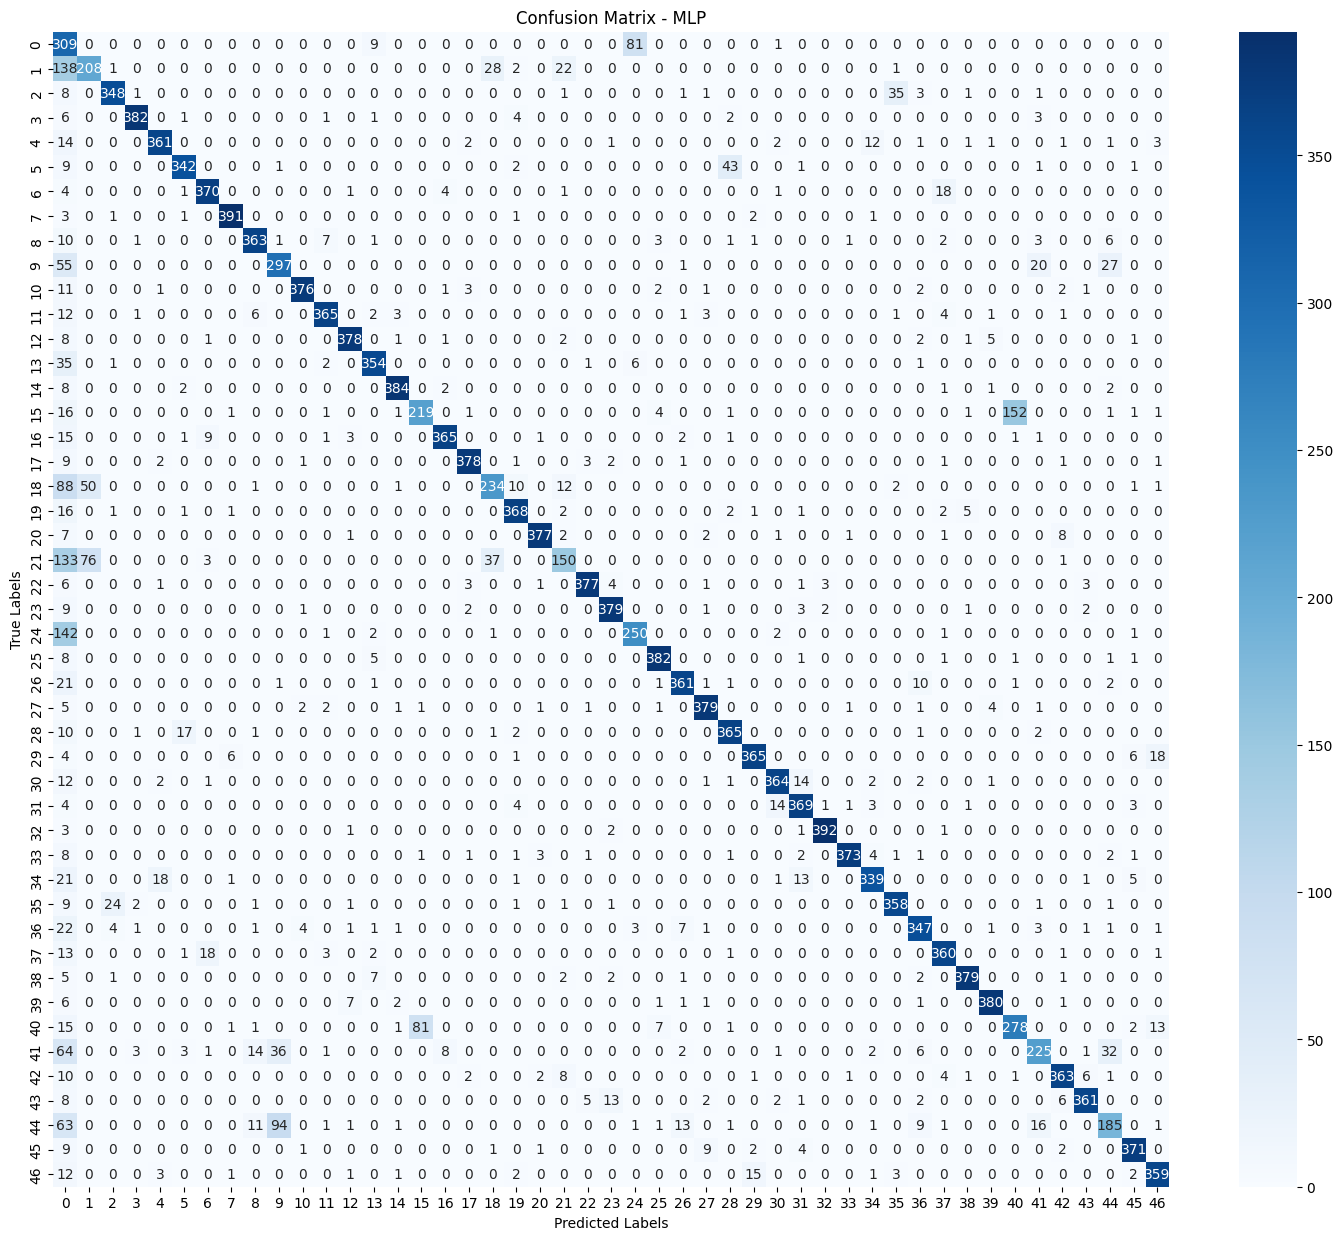

In [90]:

# At this stage, we aim to visually evaluate the classification accuracy and error types of our final MLP model using a confusion matrix.

# Calculate the confusion matrix using the true labels and the predicted labels.
cm = confusion_matrix(test_y.argmax(axis=1), np.argmax(y_pred, axis=1))

# Set up a large figure to ensure the confusion matrix is readable and clearly visible.
plt.figure(figsize=(18, 15))

# Visualize the confusion matrix using a heatmap from Seaborn. 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Label the axes of the heatmap for clarity. The x-axis represents the predicted labels by the model,
# while the y-axis represents the true labels from the dataset.
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Add a title to the heatmap for contextual clarity and to indicate the type of model being evaluated.
plt.title('Confusion Matrix - MLP')

# Display the plot.
plt.show()

Classification report for MLP

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate key performance metrics to evaluate the model.

# Calculate the accuracy of the model which represents the proportion of correct predictions among the total number of cases processed.
accuracy = accuracy_score(test_y.argmax(axis=1), y_pred.argmax(axis=1))

# Calculate the precision, which indicates the proportion of positive identifications that were actually correct.
precision = precision_score(test_y.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

# Calculate the recall, also known as sensitivity, which measures the ability of the model to find all the relevant cases within a dataset.
recall = recall_score(test_y.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

# Calculate the F1 score, which is the harmonic mean of precision and recall. 
f1 = f1_score(test_y.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

# Print the calculated metrics to provide a summary of the model's performance.
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Generate a detailed classification report that includes the precision, recall, F1-score, and support for each class.
report = classification_report(test_y.argmax(axis=1), y_pred.argmax(axis=1))
print("Classification Report:")
print(report)

Accuracy: 0.8500452151710197
Precision: 0.8811984117814841
Recall: 0.8500452151710197
F1 Score: 0.8590833297529711
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.77      0.34       400
           1       0.62      0.52      0.57       400
           2       0.91      0.87      0.89       400
           3       0.97      0.95      0.96       400
           4       0.93      0.90      0.92       400
           5       0.92      0.85      0.89       400
           6       0.92      0.93      0.92       400
           7       0.97      0.98      0.98       400
           8       0.91      0.91      0.91       400
           9       0.69      0.74      0.72       400
          10       0.98      0.94      0.96       400
          11       0.95      0.91      0.93       400
          12       0.96      0.94      0.95       400
          13       0.92      0.89      0.90       400
          14       0.97      0.96      0.96       4

## CNN

### CNN Base Model with 2 Convolution Layers, 2 Max Pooling Layers, 2 Fully Connected Layers <br>
##### Hyperparameters : <br>
1. Learning Rate Schedulers - None
2. Activation Function - ReLU
3. Optimizer - Adam
4. Batch Normalization - None
5. L1/L2 Regularization - None
6. Dropout - True

In [106]:
# The initial step of creating a CNN model involves setting up the Sequential model and layer configuration.
CNN_base_model = Sequential()

# The first layer added is a Conv2D layer with 128 filters and a 5x5 kernel size. The 'same' padding ensures the output size is the same as the input size. 
# 'ReLU' activation is used for introducing non-linearity to the model. The input shape specifies that each input image has the specified height and width, with 1 channel (grayscale).
CNN_base_model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(HEIGHT, WIDTH,1)))

# A MaxPooling2D layer reduces the spatial dimensions (height and width) of the input volume to the layer by taking the maximum value over a 2x2 window, with a stride of 2.
CNN_base_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Another Conv2D layer with 64 filters and a 3x3 kernel size. Using 'same' padding and 'ReLU' activation, this layer further processes the reduced input from the previous pooling layer.
CNN_base_model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))

# Another MaxPooling2D layer to further reduce the spatial dimensions, thereby summarizing the features extracted so far.
CNN_base_model.add(MaxPooling2D(pool_size=(2,2)))

# This layer, Flatten, is used to flatten the 3D output of the previous layer to 1D. This is necessary before using fully connected layers.
CNN_base_model.add(Flatten())

# A Dense layer with 128 units and 'ReLU' activation function to perform high-level reasoning from the learned features.
CNN_base_model.add(Dense(units=128, activation='relu'))

# A Dropout layer drops out 50% of the nodes in the previous layer during training. This is used as a regularization method to prevent overfitting.
CNN_base_model.add(Dropout(.5))

# The final Dense layer with a number of units equal to the number of classes, using 'softmax' activation. This layer outputs the probability distribution over the classes.
CNN_base_model.add(Dense(units=num_classes, activation='softmax'))

# This command prints the summary of the model, showing all the layers, their types, output shapes, and number of parameters.
CNN_base_model.summary()

c:\Users\SAUMITA\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 484,719 (1.85 MB)

 Trainable params: 484,719 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [107]:
# This configures the model for training by defining the loss function, optimizer, and metrics to monitor.
# The loss function used here is 'categorical_crossentropy', which is suitable for multi-class classification problems.
# 'Adam' optimizer is chosen for its efficiency in handling sparse gradients and adaptive learning rate capabilities.
# The metric 'accuracy' is used to evaluate the performance of the model during training and testing, which provides a clear percentage of correctly predicted instances.
CNN_base_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [108]:
# Following the definition and compilation of the model, we can now proceed to train the base CNN model.
# The 'model.fit' method is used to train the model on the training data over a specified number of epochs.
history = CNN_base_model.fit(train_x, train_y, epochs=10, batch_size=64, verbose=1, \
                    validation_data=(val_x, val_y))

Epoch 1/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 163s 101ms/step - accuracy: 0.5406 - loss: 1.6263 - val_accuracy: 0.8359 - val_loss: 0.4577
Epoch 2/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 99s 62ms/step - accuracy: 0.7965 - loss: 0.6235 - val_accuracy: 0.8620 - val_loss: 0.3895
Epoch 3/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 114s 72ms/step - accuracy: 0.8218 - loss: 0.5198 - val_accuracy: 0.8688 - val_loss: 0.3663
Epoch 4/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 104s 66ms/step - accuracy: 0.8398 - loss: 0.4685 - val_accuracy: 0.8723 - val_loss: 0.3574
Epoch 5/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 111s 70ms/step - accuracy: 0.8462 - loss: 0.4476 - val_accuracy: 0.8762 - val_loss: 0.3452
Epoch 6/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 112s 71ms/step - accuracy: 0.8555 - loss: 0.4157 - val_accuracy: 0.8802 - val_loss: 0.3374
Epoch 7/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 108s 68ms/step - accuracy: 0.8602 - loss: 0.3908 - val_accuracy: 0.8809 - val_loss: 0.3293
Epoch 8/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 110s 69ms/step - accuracy: 

### CNN Hyperparameter Tuning using HyperModel

In [42]:
from keras import layers, models, regularizers
from keras_tuner import HyperModel

class CNNHyperModel(HyperModel):
    """
    A custom HyperModel class for Keras Tuner to define and tune a CNN model's architecture and hyperparameters.

    Attributes:
        input_shape (tuple): The expected input shape for the model, e.g., (height, width, channels).
        num_classes (int): The number of target classes in the classification task.
    """

    def __init__(self, input_shape, num_classes):
        """
        Initializes the hypermodel with the required shape and number of classes for the outputs.
        """
        self.input_shape = input_shape
        self.num_classes = num_classes
        
    def build(self, hp):
        """
        Build and compile a convolutional neural network model with tunable hyperparameters.

        Uses hyperparameters defined and passed by Keras Tuner to dynamically adjust the model's architecture and training configuration.

        Parameters:
            hp (HyperParameters): A configuration from Keras Tuner containing values to tune.

        Returns:
            A compiled TensorFlow Keras model ready for training.
        """
        model = Sequential()
        
        # Add a convolutional layer. The number of filters, kernel size, and regularization strength are optimized.
        # Different activation functions are tried to find the best performing one.
        model.add(Conv2D(filters=128, kernel_size=(5,5), padding='same', 
                         activation=hp.Choice('activation', values=['relu', 'elu', 'leaky_relu']), 
                         input_shape=self.input_shape,
                         kernel_regularizer=regularizers.l1_l2(l1=hp.Choice('l1', [0.0, 0.01, 0.001]),
                                                               l2=hp.Choice('l2', [0.0, 0.01, 0.001]))))
        
        # Conditional inclusion of Batch Normalization to normalize activations of the previous layer.
        if hp.Boolean('batch_normalization'):
            model.add(BatchNormalization())
        
        model.add(MaxPooling2D(pool_size=(2,2)))
        
        # Optional Dropout layer to reduce overfitting by dropping out units randomly during training iterations.
        if hp.Boolean('dropout'):
            model.add(Dropout(rate=hp.Choice('dropout_rate', [0.5, 0.25])))
        
        model.add(Flatten())
        
        # Dense layer with dynamic activation function and units.
        model.add(Dense(units=128, activation=hp.Choice('dense_activation', values=['relu', 'elu', 'leaky_relu'])))
        
        # Output layer with softmax activation for multi-class classification.
        model.add(Dense(units=self.num_classes, activation='softmax'))
        
        # Compiling the model with a choice of optimizer and a dynamically selected learning rate.
        optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
        model.compile(optimizer=optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        
        return model


In [43]:
from keras_tuner import RandomSearch

# Define constants for the hyperparameter tuning process
HYPERBAND_MAX_EPOCHS = 5  # The maximum number of epochs to train a single model.
MAX_TRIALS = 10           # The maximum number of different hyperparameter configurations to try. 
EXECUTION_PER_TRIAL = 2   # The number of times to train each model configuration.

# Initialize the tuner object using RandomSearch. This tuner will randomly select combinations of hyperparameter values
# to find the best configuration based on the validation accuracy.
tuner = RandomSearch(
    CNNHyperModel(input_shape=(HEIGHT, WIDTH, 1), num_classes=num_classes),  # The model to tune, created using the CNNHyperModel class with specified input shape and number of classes.
    objective='val_accuracy',  # The metric to optimize during tuning. Maximizing validation accuracy.
    max_trials=MAX_TRIALS,     # The maximum number of hyperparameter combinations to try.
    executions_per_trial=EXECUTION_PER_TRIAL,  # Number of times to train each model. More executions per trial can lead to more reliable results.
    directory='keras_tuner_demo',  
    project_name='emnist_cnn_tuning'  
)

# Start the hyperparameter search. The tuner will train the model multiple times with different configurations
# and save the best performing model based on the validation accuracy.
tuner.search(
    train_x, train_y,  # Training data and labels.
    epochs=HYPERBAND_MAX_EPOCHS,  # Number of epochs to train each model.
    validation_data=(val_x, val_y)  # Data to validate the model performance.
)

# This search process will generate a lot of data and models, allowing you to select the best performing model based on the validation accuracy.

Trial 10 Complete [00h 36m 14s]
val_accuracy: 0.8333776593208313

Best val_accuracy So Far: 0.8517287373542786
Total elapsed time: 08h 46m 23s


In [50]:
# Retrieve the best model from the tuning session. This model has the highest validation accuracy among all models tested.
best_model = tuner.get_best_models(num_models=1)[0]

# Obtain the best set of hyperparameters that led to the top performance in the tuning process.
# This fetches the hyperparameters of the best performing model configuration.
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

# Print the summary of the best model. The summary includes information about the model's architecture,
# such as the number and type of layers, output shapes, and the number of parameters in each layer.
print('Best model summary:')
best_model.summary()

# Output the best hyperparameters. This helps in understanding what configurations worked best for the model.
print('Best hyperparameters found:', best_hyperparameters.values)

Best model summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,221,295 (12.29 MB)

 Trainable params: 3,221,039 (12.29 MB)

 Non-trainable params: 256 (1.00 KB)

Best hyperparameters found: {'activation': 'leaky_relu', 'l1': 0.0, 'l2': 0.0, 'batch_normalization': True, 'dropout': True, 'dense_activation': 'elu', 'optimizer': 'adam', 'dropout_rate': 0.25}


CNN Final Model with all the selected hyperparameters

In [18]:
# Using the best hyperparameters configured earlier, we now build the final CNN model. This process also includes setting up a learning rate scheduler function to dynamically adjust the learning rate during training based on the epoch.

# Learning rate scheduler function definition.
def scheduler(epoch, lr):
    """
    Adjusts the learning rate dynamically based on the epoch during training.

    This scheduler maintains the learning rate for the first 5 epochs and then applies
    an exponential decay to the learning rate starting from the 6th epoch to fine-tune
    the training process.

    Parameters:
    epoch (int): The current training epoch number.
    lr (float): The current learning rate at the start of the epoch.

    Returns:
    float: The updated learning rate for the current epoch.
    """
    if epoch < 5:
        return lr
    else:
        return lr * np.exp(-0.1)

# Initialization of the final CNN model using a Sequential model architecture.
final_model_CNN = Sequential()

# Adding a Conv2D layer with 128 filters and a kernel size of 5x5, using L1 and L2 regularization to mitigate overfitting by adding penalties to the loss function.
# Batch normalization is applied after the convolutional layer to standardize the inputs to the next layer, improving stability and reducing training time.
final_model_CNN.add(Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='leaky_relu',
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                 input_shape=(HEIGHT, WIDTH, 1)))
final_model_CNN.add(BatchNormalization())

# Adding a MaxPooling2D layer to reduce spatial dimensions and abstract higher-level features from the previous convolutional layer.
final_model_CNN.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Repeating similar layers but reducing the number of filters to 64. This hierarchical layer structure allows the network to build up complex features from simpler ones extracted in earlier layers.
final_model_CNN.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='leaky_relu',
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
final_model_CNN.add(BatchNormalization())
final_model_CNN.add(MaxPooling2D(pool_size=(2,2)))

# Flattening the output from the convolutional layers to feed it into dense layers.
final_model_CNN.add(Flatten())

# Adding a densely connected layer with 128 units, followed by a dropout layer which randomly drops 50% of the units in the dense layer during training to prevent overfitting.
final_model_CNN.add(Dense(units=128, activation='relu'))
final_model_CNN.add(Dropout(.25))

# The final layer is a softmax activation layer which outputs the probability distribution over the classes.
final_model_CNN.add(Dense(units=num_classes, activation='softmax'))

# Display the summary of the final model architecture.
final_model_CNN.summary()

# Creating the learning rate scheduler using the defined function.
lr_scheduler = LearningRateScheduler(scheduler)

# Compiling the final model with the categorical crossentropy loss function, stochastic gradient descent (SGD) optimizer, and tracking 'accuracy' as a metric.
final_model_CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


c:\Users\SAUMITA\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,487 (1.85 MB)

 Trainable params: 485,103 (1.85 MB)

 Non-trainable params: 384 (1.50 KB)

Training the Final CNN Model 

In [17]:
# The final model, which includes 2 Convolutional layers and 1 fully connected dense layer with filter sizes of 128 and 64 respectively, now undergoes training.
# We record the start time to calculate the total training duration.
start_time = time.time()

# Training the CNN model with the defined training data and parameters.
final_CNN_history = final_model_CNN.fit(
    train_x, train_y,
    epochs=10,
    batch_size=64,
    validation_data=(val_x, val_y),
    callbacks=[lr_scheduler]  # Include the learning rate scheduler callback here
)

# We record the end time of the training and calculate the duration by subtracting the start time from the end time.
end_time = time.time()

# Output the total training time to the console.
print("CNN Model Training Time:", end_time - start_time, "seconds")

Epoch 1/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 324s 203ms/step - accuracy: 0.6183 - loss: 2.2183 - val_accuracy: 0.8301 - val_loss: 0.6334 - learning_rate: 0.0010
Epoch 2/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 304s 192ms/step - accuracy: 0.8115 - loss: 0.6965 - val_accuracy: 0.8454 - val_loss: 0.5636 - learning_rate: 0.0010
Epoch 3/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 302s 190ms/step - accuracy: 0.8305 - loss: 0.6343 - val_accuracy: 0.8216 - val_loss: 0.6561 - learning_rate: 0.0010
Epoch 4/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 304s 191ms/step - accuracy: 0.8397 - loss: 0.6057 - val_accuracy: 0.7543 - val_loss: 0.9454 - learning_rate: 0.0010
Epoch 5/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 308s 194ms/step - accuracy: 0.8511 - loss: 0.5391 - val_accuracy: 0.8409 - val_loss: 0.5639 - learning_rate: 0.0010
Epoch 6/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 314s 198ms/step - accuracy: 0.8583 - loss: 0.5016 - val_accuracy: 0.8532 - val_loss: 0.5228 - learning_rate: 9.0484e-04
Epoch 7/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 317s 2

Experimenting with the Number of Filters

In [18]:
# In order to optimize our model, we modify the final model configuration, which already incorporates the best hyperparameters. The adjustments involve changing the filter sizes in the convolutional layers to better capture the features from the input images.

# Initialization of the CNN model with an increased number of filters for more detailed feature extraction.
increased_filter_model = Sequential()

# First Conv2D layer with significantly increased filters (256) aiming to capture more complex and subtle features in the input images. The larger filter count can help in learning richer representations especially useful in detailed image contexts.
increased_filter_model.add(Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu',
                                  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                                  input_shape=(HEIGHT, WIDTH, 1)))
# Batch normalization is applied immediately after the convolution operation to help standardize the inputs to the next layer, thereby speeding up the training process and achieving stability in gradients.
increased_filter_model.add(BatchNormalization())
# MaxPooling2D reduces the spatial dimensions (height and width) of the output from the previous convolutional layer, helping to make the detection of features invariant to scale and orientation changes.
increased_filter_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second Conv2D layer with a unique filter size (128) tailored to further refine the features extracted by the previous layer. This configuration helps in constructing a hierarchical representation of features.
increased_filter_model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu',
                                  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
# Applying Batch Normalization again to maintain numerical stability and accelerate the training of deep networks.
increased_filter_model.add(BatchNormalization())
# Another MaxPooling2D layer to continue the process of reducing the spatial size, and to aggregate the information, enhancing the model's ability to generalize.
increased_filter_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the 3D output of the final pooling layer into a 1D vector to serve as input to the dense layers. This step is necessary to transition from feature extraction to classification.
increased_filter_model.add(Flatten())

# Dense layer with 128 units and ReLU activation function to interpret the features, followed by a Dropout layer, which randomly sets a fraction (50%) of the input units to 0 at each update during training time, which helps to prevent overfitting.
increased_filter_model.add(Dense(units=128, activation='relu'))
increased_filter_model.add(Dropout(.5))

# The final layer uses a softmax activation function to output a probability distribution over the various classes, providing the class predictions.
increased_filter_model.add(Dense(units=num_classes, activation='softmax'))

# Displaying the summary of the model to understand the total number of trainable parameters and the output shape of each layer.
increased_filter_model.summary()

# Compiling the model with categorical crossentropy loss, which is suitable for multi-class classification problems, and using the stochastic gradient descent (SGD) optimizer along with monitoring the 'accuracy' metric during training.
increased_filter_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 256)    │         6,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,112,239 (4.24 MB)

 Trainable params: 1,111,471 (4.24 MB)

 Non-trainable params: 768 (3.00 KB)

In [19]:
# The model with an increased number of filters is now ready to be trained. This model is designed to potentially capture more detailed features due to its higher number of filters in the convolutional layers.

# Record the current time to calculate the training duration later. This helps in benchmarking the model performance and efficiency.
start_time = time.time()

# Training the increased filter model with the defined training data and parameters. 
CNN_more_filters_history = increased_filter_model.fit(
    train_x, train_y,
    epochs=10,
    batch_size=64,
    validation_data=(val_x, val_y),
    callbacks=[lr_scheduler]  # Include the learning rate scheduler callback here
)

# After training, record the end time.
end_time = time.time()

# Calculate and print the total training time. This metric is useful for comparing the computational efficiency of different model configurations and understanding the impact of increased complexity.
print("Increased Filter CNN Model Training Time:", end_time - start_time, "seconds")

Epoch 1/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 636s 400ms/step - accuracy: 0.4695 - loss: 7.2201 - val_accuracy: 0.7912 - val_loss: 3.0523 - learning_rate: 0.0100
Epoch 2/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 641s 404ms/step - accuracy: 0.7532 - loss: 2.5845 - val_accuracy: 0.8156 - val_loss: 1.0553 - learning_rate: 0.0100
Epoch 3/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 631s 397ms/step - accuracy: 0.7812 - loss: 1.0721 - val_accuracy: 0.5542 - val_loss: 2.0193 - learning_rate: 0.0100
Epoch 4/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 605s 381ms/step - accuracy: 0.7994 - loss: 0.8227 - val_accuracy: 0.6618 - val_loss: 1.3536 - learning_rate: 0.0100
Epoch 5/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 603s 380ms/step - accuracy: 0.8151 - loss: 0.7208 - val_accuracy: 0.8500 - val_loss: 0.5824 - learning_rate: 0.0100
Epoch 6/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 636s 401ms/step - accuracy: 0.8265 - loss: 0.6645 - val_accuracy: 0.8554 - val_loss: 0.5434 - learning_rate: 0.0090
Epoch 7/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 646s 407ms

Observation : The CNN model with 2 convolutional layers with increased filter size (256 and 128) takes almost double the training time and produces training accuracy of 84.97%, training loss of 0.55, validation accuracy of 83.82 and validation loss of 0.57, whereas the earlier model having the same number of layers with filter sizes 128 and 64, showed a training accuracy of 87.90, training loss of 0.40, validation accuracy of 87.20 and validation loss of 0.49, which was clearly better than the current one with increasd filter size. So the previous one remains preferrable over this variation of the CNN model.

##### <br>Experimenting by adding an Extra Convolutional Layer 

In [16]:
# In order to further optimize our model, we extend the existing model architecture which already incorporates optimized hyperparameters by adding an extra convolutional layer. This addition aims to enhance the model's capacity to learn more complex patterns from the extracted features.

# Initialization of the CNN model with an increased number of filters for more detailed feature extraction.
increased_convolutional_layer_model = Sequential()

# First Conv2D layer with filters 128 aiming to capture more complex and subtle features in the input images. The larger filter count is intended to help in learning richer representations, which is particularly beneficial for detailed image contexts.
increased_convolutional_layer_model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu',
                                  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                                  input_shape=(HEIGHT, WIDTH, 1)))
# Batch normalization is applied immediately after the convolution operation to help standardize the inputs to the next layer, thereby speeding up the training process and achieving stability in gradients.
increased_convolutional_layer_model.add(BatchNormalization())
# MaxPooling2D reduces the spatial dimensions (height and width) of the output from the previous convolutional layer, helping to make the detection of features invariant to scale and orientation changes.
increased_convolutional_layer_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second Conv2D layer with a filter size 64 tailored to further refine the features extracted by the previous layer. This setup aids in constructing a hierarchical representation of features.
increased_convolutional_layer_model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu',
                                  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
# Applying Batch Normalization again to maintain numerical stability and accelerate the training of deep networks.
increased_convolutional_layer_model.add(BatchNormalization())
# Another MaxPooling2D layer continues the process of reducing the spatial size, and to aggregate the information, enhancing the model's ability to generalize.
increased_convolutional_layer_model.add(MaxPooling2D(pool_size=(2, 2)))

# Additional third Conv2D layer with filters 32 aiming to capture more complex and subtle features in the input images. The larger filter count is intended to help in learning richer representations, which is particularly beneficial for detailed image contexts.
increased_convolutional_layer_model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu',
                                  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                                  input_shape=(HEIGHT, WIDTH, 1)))
# Batch normalization is applied immediately after the convolution operation to help standardize the inputs to the next layer, thereby speeding up the training process and achieving stability in gradients.
increased_convolutional_layer_model.add(BatchNormalization())
# MaxPooling2D reduces the spatial dimensions (height and width) of the output from the previous convolutional layer, helping to make the detection of features invariant to scale and orientation changes.
increased_convolutional_layer_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flattening the 3D output of the final pooling layer into a 1D vector to serve as input to the dense layers. This step is crucial to transition from feature extraction to classification.
increased_convolutional_layer_model.add(Flatten())

# First dense layer with 128 units and ReLU activation function to interpret the features, followed by a Dropout layer, which helps prevent overfitting by randomly setting a fraction (50%) of the input units to 0 at each update during training.
increased_convolutional_layer_model.add(Dense(units=128, activation='leaky_relu'))
increased_convolutional_layer_model.add(Dropout(.5))

# The final layer uses a softmax activation function to output a probability distribution over the various classes, providing the class predictions.
increased_convolutional_layer_model.add(Dense(units=num_classes, activation='softmax'))

# Display the summary of the model to understand the total number of trainable parameters and the output shape of each layer.
increased_convolutional_layer_model.summary()

# Compiling the model with categorical crossentropy loss, which is suitable for multi-class classification problems, and using the stochastic gradient descent (SGD) optimizer along with monitoring the 'accuracy' metric during training.
increased_convolutional_layer_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

c:\Users\SAUMITA\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,527 (1017.68 KB)

 Trainable params: 260,015 (1015.68 KB)

 Non-trainable params: 512 (2.00 KB)

In [19]:

# The model with an increased number of filters is now ready for training. It is designed to capture more detailed features due to the higher number of filters in the convolutional layers, which should enhance its ability to learn complex patterns.

# Start timing the training process to measure how long it takes, which will help us assess the model's performance and efficiency.
start_time = time.time()

# Train the model with the specified training data and parameters.
CNN_more_layers_history = increased_convolutional_layer_model.fit(
    train_x, train_y,
    epochs=10,
    batch_size=64,
    validation_data=(val_x, val_y),
    callbacks=[lr_scheduler]  # Include the learning rate scheduler to dynamically adjust the learning rate based on training progress.
)

# Stop timing the training process and calculate the duration.
end_time = time.time()

# Output the total training time, providing insights into the computational demand and efficiency of the model with increased filters. This information is valuable for evaluating the trade-offs between training time and model performance.
print("Increased Convolutional Layer CNN Model Training Time:", end_time - start_time, "seconds")


Epoch 1/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 354s 220ms/step - accuracy: 0.5286 - loss: 5.6724 - val_accuracy: 0.8305 - val_loss: 2.7157 - learning_rate: 0.0100
Epoch 2/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 338s 213ms/step - accuracy: 0.7944 - loss: 2.4479 - val_accuracy: 0.8238 - val_loss: 1.4602 - learning_rate: 0.0100
Epoch 3/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 311s 196ms/step - accuracy: 0.8122 - loss: 1.3669 - val_accuracy: 0.8414 - val_loss: 0.9780 - learning_rate: 0.0100
Epoch 4/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 307s 194ms/step - accuracy: 0.8249 - loss: 1.0139 - val_accuracy: 0.6956 - val_loss: 1.3739 - learning_rate: 0.0100
Epoch 5/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 283s 178ms/step - accuracy: 0.8295 - loss: 0.9075 - val_accuracy: 0.7909 - val_loss: 0.9687 - learning_rate: 0.0100
Epoch 6/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 348s 219ms/step - accuracy: 0.8432 - loss: 0.8179 - val_accuracy: 0.8452 - val_loss: 0.7571 - learning_rate: 0.0090
Epoch 7/10
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 362s 228ms

Observation : The CNN model with 3 convolutional layers with filter size (128,64,64) produces training accuracy of 85.67%, training loss of 0.68, validation accuracy of 86.17 and validation loss of 0.64 and took almost the same time to train as compared to the earlier model which has 2 layers with filter sizes 128 and 64 and which showed a training accuracy of 87.90, training loss of 0.40, validation accuracy of 87.20 and validation loss of 0.49. So comparing the losses and the accuracies, the earlier model with 2 convolutional layers with filters 128 and 64 remain our choice as the final CNN model.

##### <br>Evaluating the Final CNN Models

In [22]:
# In the evaluation phase of the CNN, we assess the performance of the CNN models using unseen test data. This step is critical to determine how well the model has generalized during training.

def evaluate_CNN_model(model, test_x, test_y):
    """
    Evaluate the performance of a given model using a test dataset, and compute the accuracy by comparing predictions to actual labels.

    Args:
        model: The trained machine learning model to be evaluated.
        test_x (np.array): Input features from the test dataset.
        test_y (np.array): True labels corresponding to the input features from the test dataset.

    Returns:
        tuple: A tuple containing the test loss and test accuracy.
    
    Description:
        This function compiles the model with a specific loss function and optimizer, then evaluates its performance
        on the test dataset to obtain the loss and accuracy. It further makes predictions on the test dataset and 
        converts them into probability outputs - either 0 or 1, depending on a threshold.
    """
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    # The 'evaluate' method computes the loss and accuracy of the model on the test dataset, 'test_x' and 'test_y', where 'test_x' are the input features and 'test_y' are the labels.
    # The 'verbose=0' argument specifies that the output during evaluation should be minimal, meaning no logging output will be shown during the process.
    test_loss_CNN, test_accuracy_CNN = model.evaluate(test_x, test_y, verbose=0)
    
    # Output the test loss and accuracy to the console. These metrics are crucial for understanding the effectiveness of the model in practical scenarios, providing insight into how well the model performs when faced with new data.
    print("Test Loss:", test_loss_CNN)
    print("Test Accuracy:", test_accuracy_CNN)

    # To ensure validity, we are printing the predicted class labels to validate and analyze the model's classification accuracy on unseen test data.
    # Predict the class probabilities for each input in the test set using the trained CNN model.
    # The 'predict' method outputs the probability of each class for each input example from the test dataset 'test_x'.
    y_pred = model.predict(test_x)

    # Convert the probabilities to a binary class decision (0 or 1) by applying a threshold.
    # Here, any predicted probability greater than 0.5 is considered class 1 (True), otherwise class 0 (False).
    # This thresholding step converts probability outputs into a final class decision, which is necessary for evaluating model performance with metrics such as accuracy, precision, etc.
    y_pred = (y_pred > 0.5)
    
    
    return test_loss_CNN, test_accuracy_CNN

In [117]:
# Evaluate the enhanced CNN model with increased filters.
# This step uses the 'evaluate_CNN_model' function to determine how effectively the modified CNN model, which features an increased number of filters, performs on unseen data.
evaluate_CNN_model(increased_filter_model, test_x, test_y)

Test Loss: 0.48047778010368347
Test Accuracy: 0.8708441853523254
588/588 ━━━━━━━━━━━━━━━━━━━━ 35s 60ms/step


(0.48047778010368347, 0.8708441853523254)

In [25]:
# Evaluate the CNN model that has additional convolutional layers.
# This code segment uses the 'evaluate_CNN_model' function to assess the performance of our modified CNN model, which includes extra convolutional layers to potentially enhance feature extraction capabilities. 
evaluate_CNN_model(increased_convolutional_layer_model, test_x, test_y)

Test Loss: 0.7091690897941589
Test Accuracy: 0.8473322987556458
588/588 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step


(0.7091690897941589, 0.8473322987556458)

In [119]:
# Evaluate the final CNN model's performance using test data.
# The 'evaluate_CNN_model' function returns performance metrics after assessing the 'final_model_CNN' with the test datasets 'test_x' (inputs) and 'test_y' (expected outputs).
scores_CNN = evaluate_CNN_model(final_model_CNN, test_x, test_y)

# Extract the test loss from the first element of the scores array. This metric quantifies how well the model's predictions align with the actual labels,
# with lower values indicating better performance.
test_loss_CNN = scores_CNN[0]

# Extract the test accuracy from the second element of the scores array.
# This metric shows the proportion of correct predictions made by the model,
# with higher percentages indicating higher effectiveness.
test_accuracy_CNN = scores_CNN[1]

# Output the test loss and accuracy.
print("Test loss : ", test_loss_CNN)
print("Test accuracy : ", test_accuracy_CNN)


Test Loss: 0.43577784299850464
Test Accuracy: 0.8790892958641052
588/588 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step
Test loss :  0.43577784299850464
Test accuracy :  0.8790892958641052


Observation: Three different CNN models were evaluated on the test dataset and the final model chosen earlier on the basis of training results show the best test results also as compared to the other variations, with a test accuracy of 87.91% and test loss of 0.44 as compared to the one with increased convolutional layers with test accuracy of 84.73% and test loss of 0.71 and the other model with increased filter sizes which produced test accuracy of 87.08 and test loss of 0.48., but took double the time to train.

In [ ]:
# Predict the class probabilities with the final model CNN and convert them to binary class decision using threshold
y_pred = final_model_CNN.predict(test_x)
y_pred = (y_pred > 0.5)

### CNN Model  -  Loss and Accuracy Plots

In [122]:
# To help visualize the performance of the base model, graphs are produced to plot accuracy versus epoch and loss versus epoch. These visualizations show how the model's accuracy and loss evolve during training and validation, providing insights into its learning progress and generalization ability.
def plot_graphs(epochs, acc, val_acc, loss, val_loss, title):
    """
    Plot training and validation accuracy and loss graphs to visualize the learning performance of the CNN model across epochs.

    This function generates two plots in a single figure: the first plot shows the training and validation accuracy as a function of epochs,
    and the second plot shows the training and validation loss. These plots are essential for visually assessing the model's ability to learn
    and generalize over time, highlighting trends and potential issues such as overfitting or underfitting.

    Parameters:
    epochs (list): A list of integers representing the epoch indices.
    acc (list): List of accuracy scores from the training dataset across epochs.
    val_acc (list): List of accuracy scores from the validation dataset across epochs.
    loss (list): List of loss values from the training dataset across epochs.
    val_loss (list): List of loss values from the validation dataset across epochs.
    """
    # Set up a figure with two subplots for accuracy and loss, respectively.
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
   
    # Accuracy subplot
    # Plot both training and validation accuracy to compare performance and detect overfitting.
    axes[0].plot(epochs, acc, 'b', label='Training accuracy')
    axes[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    if str(title) == 'base': 
        axes[0].set_title('CNN Base Model Accuracy')
    else:
        axes[0].set_title('CNN Final Model Accuracy')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].legend()

    # Loss subplot
    # Plot both training and validation loss to monitor the convergence of the model during training.
    axes[1].plot(epochs, loss, 'b', label='Training loss')
    axes[1].plot(epochs, val_loss, 'r', label='Validation loss')
    if str(title) == 'base': 
        axes[1].set_title('CNN Base Model Loss')
    else:
        axes[1].set_title('CNN Final Model Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].legend()

    # Adjust layout to avoid overlap and ensure plots are clearly displayed.
    plt.tight_layout()
    plt.show()


" # Retrieve accuracy and loss data from the model's training history.\nacc = history.history['accuracy']\nval_acc = history.history['val_accuracy']\nloss = history.history['loss']\nval_loss = history.history['val_loss']\nepochs = range(1, len(acc) + 1)\n\n# Plot the graphs to visualize the model's accuracy and loss across epochs. This helps in understanding the model's learning dynamics\n# and provides insights into its training and validation performance, facilitating adjustments to the training process if necessary.\nplot_graphs(epochs, acc, val_acc, loss, val_loss) "

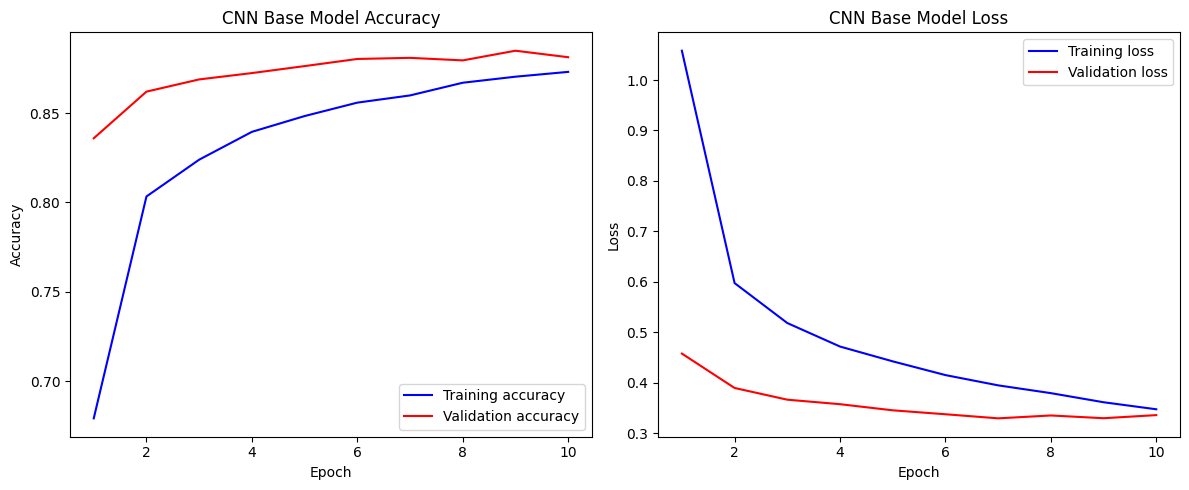

In [123]:
# Retrieve accuracy and loss data from the base model's training history.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot the graphs to visualize the model's accuracy and loss across epochs. This helps in understanding the model's learning dynamics
# and provides insights into its training and validation performance, facilitating adjustments to the training process if necessary.
plot_graphs(epochs, acc, val_acc, loss, val_loss, title='base')

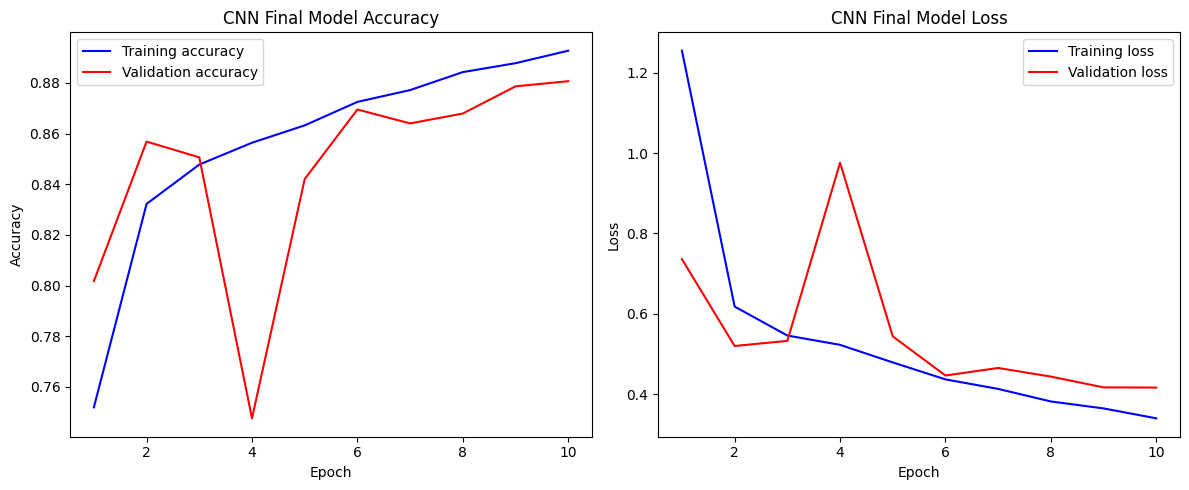

In [124]:
# Retrieve accuracy and loss data from the final CNN model's training history.

acc = final_CNN_history.history['accuracy']
val_acc = final_CNN_history.history['val_accuracy']
loss = final_CNN_history.history['loss']
val_loss = final_CNN_history.history['val_loss']
epochs = range(1,len(acc)+1)

# Plot the graphs
plot_graphs(epochs, acc, val_acc, loss, val_loss, title='final')

Testing the CNN model - Display the predicted labels and true labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Predicted Labels: [39  9 26 44 33 14]
True Labels: [39  9 26 44 33 14]


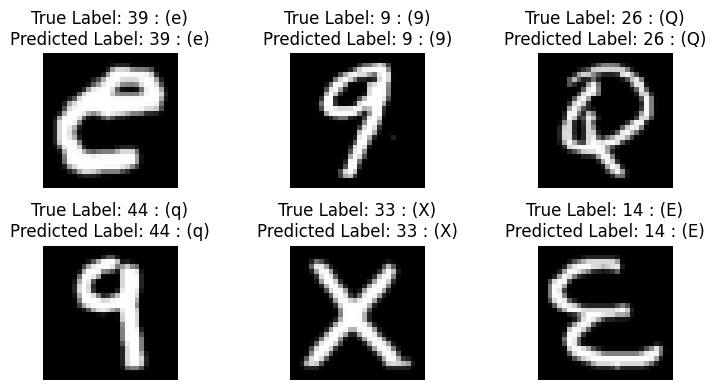

In [137]:
# The final stage of model evaluation involves visualizing the model's predictions to assess its performance on real data. Here, we print and visually compare the predictions for the top six samples in the testing dataset against their true labels.

# Select the top six samples from the testing dataset for prediction.
top_six_samples = test_x[:6]

# Extract the true labels for these samples for comparison.
true_labels = test_y.argmax(axis=1)[:6]

# Use the model to predict the labels for the selected samples.
predictions = final_model_CNN.predict(top_six_samples)

# Convert the predicted probabilities to label indices for a straightforward comparison.
predicted_labels = np.argmax(predictions, axis=1)

# Print out the predicted and true labels to see how well the model is performing on these specific examples.
print("Predicted Labels:", predicted_labels)
print("True Labels:", true_labels)

def plot_images(images, true_labels, predicted_labels):
    """
    Plot images with their true and predicted labels to visually assess the accuracy of the model.

    This function displays a series of images in a 2x3 grid, each annotated with its true and predicted labels. 
    This visual representation helps in understanding the model's performance by comparing the predicted 
    labels against the actual labels. It is especially useful for identifying cases where the model may be 
    confused and misclassifying certain types of images.

    Parameters:
    images (array): An array of images to be displayed. Assumes images are in a format that can be reshaped to 28x28.
    true_labels (list): A list of integers representing the true labels of the images.
    predicted_labels (list): A list of integers representing the labels predicted by the model for the images.

    """
    plt.figure(figsize=(8, 4))  # Set the figure size for better visibility.
    for i in range(len(images)):  # Loop over the number of images to plot each one.
        plt.subplot(2, 3, i+1)  # Create subplots in a 2x3 layout.
        plt.imshow(images[i].reshape(28, 28), cmap='gray')  # Display the image in grayscale.

        # Retrieve the ASCII code corresponding to the true label of the i-th image from the mapping dataframe.
        true_ascii_code = mapp.loc[true_labels[i], 'ascii']
    
        # Retrieve the ASCII code corresponding to the predicted label of the i-th image from the mapping dataframe.
        predicted_ascii_code = mapp.loc[predicted_labels[i], 'ascii']
        
        # Set the title of each subplot to include both true and predicted labels along with their corresponding characters.
        plt.title(f'True Label: {true_labels[i]} : ({chr(true_ascii_code)})\nPredicted Label: {predicted_labels[i]} : ({chr(predicted_ascii_code)})')

        plt.axis('off')  # Hide the axis as they are not necessary.
    plt.tight_layout()  # Adjust layout to prevent overlap.
    plt.show()

# Plot the images along with their true and predicted labels to visually assess the accuracy of the model.
plot_images(top_six_samples, true_labels, predicted_labels)

CNN Final Model - Confusion Matrix

588/588 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step


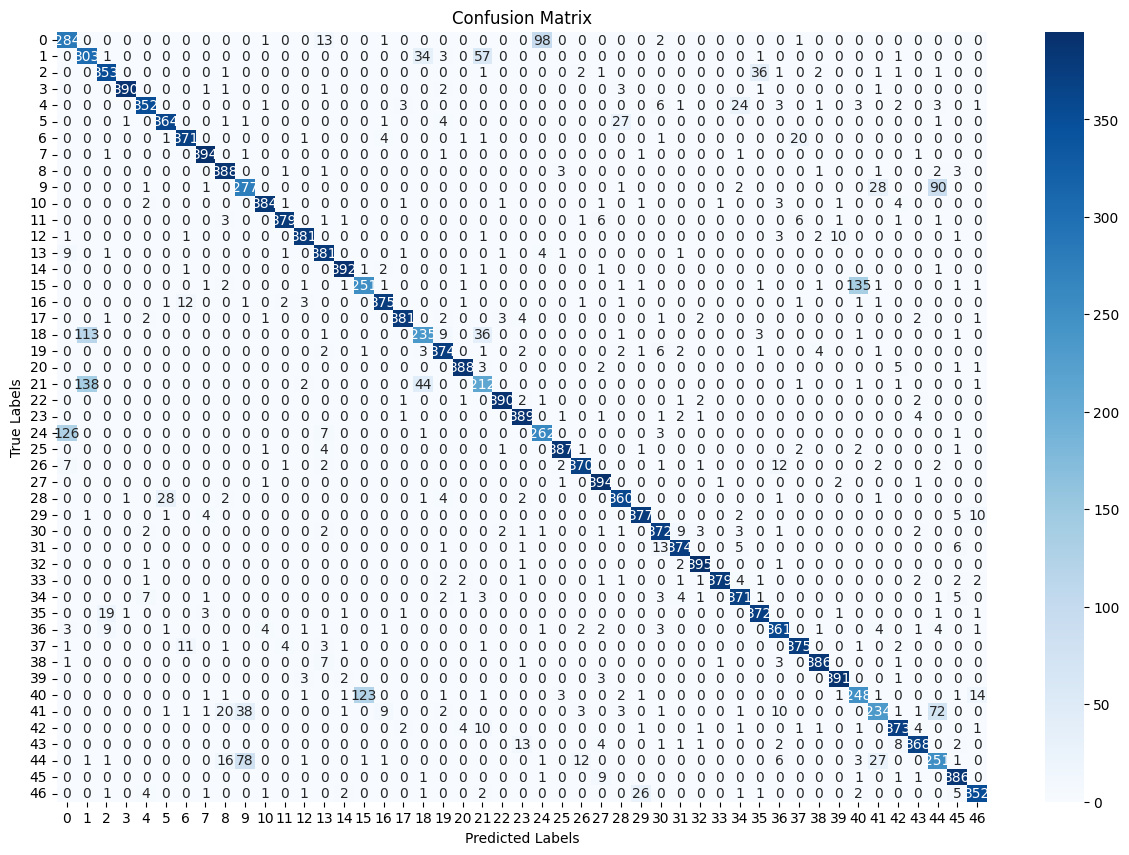

In [128]:
import seaborn as sns

# Finally, the confusion matrix is plotted to visually evaluate the model's classification accuracy across all classes. This is crucial for understanding how well the model discriminates between each class.

# Predict labels for the entire test dataset to get a comprehensive view of model performance.
y_pred_full = final_model_CNN.predict(test_x)
y_pred_full = np.argmax(y_pred_full, axis=1)

# Compute the confusion matrix using the true labels and the predicted labels.
# This provides a summary of how many predictions fall into each category of the actual classes.
cm = confusion_matrix(test_y.argmax(axis=1), y_pred_full)

# Plot the confusion matrix using Seaborn's heatmap function for better visual aesthetics and clarity.
plt.figure(figsize=(18, 15))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()


Summarize the performance of two models using accuracy, report the precision, recall and F1 score 

Classification Report For CNN

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate metrics to evaluate the overall effectiveness of the model on the test dataset.

# Accuracy: This metric calculates the proportion of correctly predicted observations to the total observations.
accuracy = accuracy_score(test_y.argmax(axis=1), y_pred.argmax(axis=1))

# Precision: Measures the accuracy of positive predictions. Formulated as the ratio of true positives to the sum of true and false positives.
precision = precision_score(test_y.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

# Recall: Also known as sensitivity, measures the ability of the model to find all the relevant cases (true positives).
recall = recall_score(test_y.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

# F1 Score: A weighted average of precision and recall. This score takes both false positives and false negatives into account.
f1 = f1_score(test_y.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

# Print the calculated metrics to assess the model's performance. These metrics provide insights into different aspects of the model's prediction accuracy and reliability.
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print a classification report that includes the aforementioned metrics.
print(classification_report(test_y.argmax(axis=1), y_pred.argmax(axis=1)))


Accuracy: 0.8500452151710197
Precision: 0.8811984117814841
Recall: 0.8500452151710197
F1 Score: 0.8590833297529711
              precision    recall  f1-score   support

           0       0.22      0.77      0.34       400
           1       0.62      0.52      0.57       400
           2       0.91      0.87      0.89       400
           3       0.97      0.95      0.96       400
           4       0.93      0.90      0.92       400
           5       0.92      0.85      0.89       400
           6       0.92      0.93      0.92       400
           7       0.97      0.98      0.98       400
           8       0.91      0.91      0.91       400
           9       0.69      0.74      0.72       400
          10       0.98      0.94      0.96       400
          11       0.95      0.91      0.93       400
          12       0.96      0.94      0.95       400
          13       0.92      0.89      0.90       400
          14       0.97      0.96      0.96       400
          15       0

#### Comparision of Two Models - MLP and CNN <br>

Comparison of the test losses and test accuracies of the 2 models - MLP and CNN

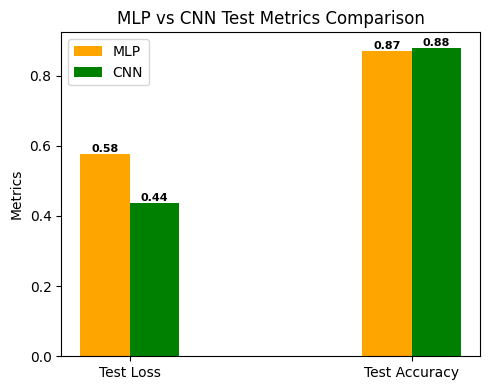

In [21]:
def plot_test_metrics_and_accuracies(mlp_test_loss, cnn_test_loss, mlp_test_acc, cnn_test_acc):
    """
    Plot bar graphs to compare test loss and accuracy between an MLP model and a CNN model.

    This function creates a visual comparison of test metrics between two types of neural networks:
    Multilayer Perceptron (MLP) and Convolutional Neural Network (CNN). It helps in assessing which
    model performs better in terms of loss and accuracy on the test data.

    Parameters:
    mlp_test_loss (float): Test loss value for the MLP model.
    cnn_test_loss (float): Test loss value for the CNN model.
    mlp_test_acc (float): Test accuracy value for the MLP model.
    cnn_test_acc (float): Test accuracy value for the CNN model.
    """
    # To visually compare the effectiveness of MLP and CNN models, this function plots their test loss and accuracy metrics side by side.
    
    # Set up data for joint bar plots
    test_metrics = ['Test Loss', 'Test Accuracy']
    num_metrics = len(test_metrics)
    bar_width = 0.35
    index = np.arange(num_metrics)

    fig, ax = plt.subplots(figsize=(5, 4))

    # Plot joint bar plot for test losses and accuracies
    bars_loss = ax.bar(index - bar_width/4, [mlp_test_loss, mlp_test_acc], bar_width/2, color='orange', label='MLP')
    bars_acc = ax.bar(index + bar_width/4, [cnn_test_loss, cnn_test_acc], bar_width/2, color='green', label='CNN')

    ax.set_title('MLP vs CNN Test Metrics Comparison')
    ax.set_ylabel('Metrics')
    ax.set_xticks(index)
    ax.set_xticklabels(test_metrics)
    ax.legend()

    # Add text labels on top of bars for better readability and precise metrics display.
    for bars in [bars_loss, bars_acc]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height, '{:.2f}'.format(height), ha='center', va='bottom', fontsize=8, color='black', weight='bold')

    plt.tight_layout()
    plt.show()

# Plot the test losses and test accuracies for both models to visually assess their performance.
plot_test_metrics_and_accuracies(test_loss_MLP, test_loss_CNN, test_accuracy_MLP, test_accuracy_CNN)

Comparison of prediction time of both models - MLP and CNN

In [131]:
def compare_prediction_time(model1, model2, test_data):
    """
    Measure and compare the prediction time for two different machine learning models.

    This function times how long each model takes to make predictions on the same test dataset. It provides a direct comparison
    of the computational efficiency of the two models under identical conditions. Such comparisons are crucial when assessing
    models for deployment in time-sensitive applications.

    Parameters:
    model1 : A trained machine learning model (e.g., MLP).
    model2 : Another trained machine learning model (e.g., CNN).
    test_data : Data on which predictions are to be made. 

    Outputs:
    The function prints the time taken by each model to make predictions on the provided test data.
    """
    # Record the start time, make predictions, and record the end time to calculate prediction time for model1.
    start_time_model1 = time.time()
    predictions_model1 = model1.predict(test_data)
    end_time_model1 = time.time()
    prediction_time_model1 = end_time_model1 - start_time_model1

    # Record the start time, make predictions, and record the end time to calculate prediction time for model2.
    start_time_model2 = time.time()
    predictions_model2 = model2.predict(test_data)
    end_time_model2 = time.time()
    prediction_time_model2 = end_time_model2 - start_time_model2

    # Print the prediction time for each model to understand their efficiency.
    print("\nPrediction Time for Model MLP:", prediction_time_model1, "seconds")
    print("\nPrediction Time for Model CNN:", prediction_time_model2, "seconds")

# Example call to the function: compare the prediction times of an MLP model and a CNN model using test data.
compare_prediction_time(final_model_MLP, final_model_CNN, test_x)

588/588 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
588/588 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step

Prediction Time for Model MLP: 4.362633466720581 seconds

Prediction Time for Model CNN: 15.204936504364014 seconds


Comparison Plot for training and validation losses and accuracies of the 2 models - MLP and CNN

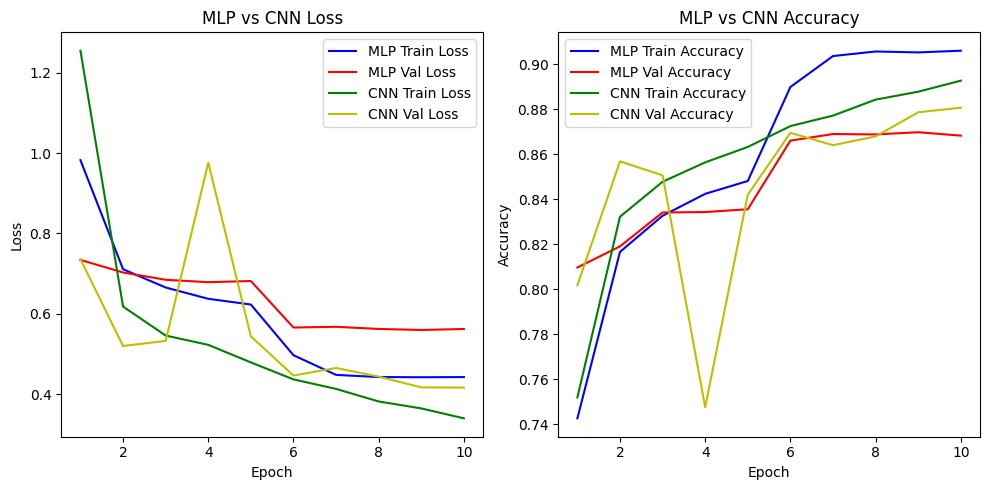

In [132]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(mlp_train_loss, mlp_val_loss, cnn_train_loss, cnn_val_loss, mlp_train_acc, mlp_val_acc, cnn_train_acc, cnn_val_acc, epochs):
    """
    Plot comparative graphs for training and validation losses and accuracies for two models: MLP and CNN.

    This function creates a visual comparison between the Multi-layer Perceptron (MLP) and Convolutional Neural Network (CNN)
    models by plotting their training and validation loss and accuracy over epochs. Such comparative plots are useful for assessing
    the performance and generalization ability of each model over the course of training.

    Parameters:
    mlp_train_loss (list): Training loss values for the MLP model.
    mlp_val_loss (list): Validation loss values for the MLP model.
    cnn_train_loss (list): Training loss values for the CNN model.
    cnn_val_loss (list): Validation loss values for the CNN model.
    mlp_train_acc (list): Training accuracy values for the MLP model.
    mlp_val_acc (list): Validation accuracy values for the MLP model.
    cnn_train_acc (list): Training accuracy values for the CNN model.
    cnn_val_acc (list): Validation accuracy values for the CNN model.
    epochs (iterable): An iterable of epoch numbers corresponding to the data points.
    """
    # Initialize a figure with two subplots horizontally: one for loss and one for accuracy comparison.
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Loss subplot for both MLP and CNN.
    axes[0].plot(epochs, mlp_train_loss, 'b', label='MLP Train Loss')
    axes[0].plot(epochs, mlp_val_loss, 'r', label='MLP Val Loss')
    axes[0].plot(epochs, cnn_train_loss, 'g', label='CNN Train Loss')
    axes[0].plot(epochs, cnn_val_loss, 'y', label='CNN Val Loss')
    axes[0].set_title('MLP vs CNN Loss')
    axes[0].set_ylabel('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].legend()

    # Accuracy subplot for both MLP and CNN.
    axes[1].plot(epochs, mlp_train_acc, 'b', label='MLP Train Accuracy')
    axes[1].plot(epochs, mlp_val_acc, 'r', label='MLP Val Accuracy')
    axes[1].plot(epochs, cnn_train_acc, 'g', label='CNN Train Accuracy')
    axes[1].plot(epochs, cnn_val_acc, 'y', label='CNN Val Accuracy')
    axes[1].set_title('MLP vs CNN Accuracy')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].legend()

    # Adjust layout to ensure the plots are displayed neatly without overlapping.
    plt.tight_layout()
    plt.show()

# Example usage:
# Assume final_model_history_MLP and final_CNN_history are variables storing training histories of respective models.
mlp_train_loss = final_model_history_MLP.history['loss']
mlp_val_loss = final_model_history_MLP.history['val_loss']
cnn_train_loss = final_CNN_history.history['loss']
cnn_val_loss = final_CNN_history.history['val_loss']
mlp_train_acc = final_model_history_MLP.history['accuracy']
mlp_val_acc = final_model_history_MLP.history['val_accuracy']
cnn_train_acc = final_CNN_history.history['accuracy']
cnn_val_acc = final_CNN_history.history['val_accuracy']
epochs = range(1, len(mlp_train_loss) + 1)

# Plot the graphs
plot_loss_accuracy(mlp_train_loss, mlp_val_loss, cnn_train_loss, cnn_val_loss, mlp_train_acc, mlp_val_acc, cnn_train_acc, cnn_val_acc, epochs)
